# **Loading Necessary Libraries and Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

import warnings
warnings.filterwarnings('ignore')



%matplotlib inline

In [ ]:
df = pd.read_csv('/content/cleaned_data.csv')
df.head()

Unnamed: 0 cust_id  number_of_open_accounts  number_of_closed_accounts  \
0           0  C00001                        1                          1   
1           1  C00002                        3                          1   
2           2  C00003                        2                          1   
3           3  C00004                        3                          0   
4           4  C00005                        4                          2   

   total_loan_months  delinquent_months  total_dpd  enquiry_count  \
0                 42                  0          0              3   
1                 96                 12         60              5   
2                 82                 24        147              6   
3                115                 15         87              5   
4                120                  0          0              5   

   credit_utilization_ratio  age  ... loan_amount processing_fee     gst  \
0                         7   44  ...     2467000        49340.0  444060   
1                         4   38  ...     3883000        77660.0  698940   
2                        58   46  ...     2170000        43400.0  390600   
3                        26   55  ...     1747000        34940.0  314460   
4                        10   37  ...     4520000        90400.0  813600   

   net_disbursement  loan_tenure_months principal_outstanding  \
0           1973600                  33               1630408   
1           3106400                  30                709309   
2           1736000                  21               1562399   
3           1397600                   6               1257839   
4           3616000                  28               1772334   

   bank_balance_at_application disbursal_date installment_start_dt  default  
0                       873386     2019-07-24           2019-08-10    False  
1                       464100     2019-07-24           2019-08-15    False  
2                      1476042     2019-07-24           2019-08-21    False  
3                      1031094     2019-07-24           2019-08-09    False  
4                      1032458     2019-07-24           2019-08-02    False  

[5 rows x 33 columns]

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace= True)
df.head()

cust_id  number_of_open_accounts  number_of_closed_accounts  \
0  C00001                        1                          1   
1  C00002                        3                          1   
2  C00003                        2                          1   
3  C00004                        3                          0   
4  C00005                        4                          2   

   total_loan_months  delinquent_months  total_dpd  enquiry_count  \
0                 42                  0          0              3   
1                 96                 12         60              5   
2                 82                 24        147              6   
3                115                 15         87              5   
4                120                  0          0              5   

   credit_utilization_ratio  age gender  ... loan_amount processing_fee  \
0                         7   44      M  ...     2467000        49340.0   
1                         4   38      M  ...     3883000        77660.0   
2                        58   46      F  ...     2170000        43400.0   
3                        26   55      F  ...     1747000        34940.0   
4                        10   37      M  ...     4520000        90400.0   

      gst  net_disbursement loan_tenure_months  principal_outstanding  \
0  444060           1973600                 33                1630408   
1  698940           3106400                 30                 709309   
2  390600           1736000                 21                1562399   
3  314460           1397600                  6                1257839   
4  813600           3616000                 28                1772334   

  bank_balance_at_application disbursal_date  installment_start_dt default  
0                      873386     2019-07-24            2019-08-10   False  
1                      464100     2019-07-24            2019-08-15   False  
2                     1476042     2019-07-24            2019-08-21   False  
3                     1031094     2019-07-24            2019-08-09   False  
4                     1032458     2019-07-24            2019-08-02   False  

[5 rows x 32 columns]

In [ ]:
df.dtypes

cust_id                         object
number_of_open_accounts          int64
number_of_closed_accounts        int64
total_loan_months                int64
delinquent_months                int64
total_dpd                        int64
enquiry_count                    int64
credit_utilization_ratio         int64
age                              int64
gender                          object
marital_status                  object
employment_status               object
income                           int64
number_of_dependants             int64
residence_type                  object
years_at_current_address         int64
city                            object
state                           object
zipcode                          int64
loan_purpose                    object
loan_type                       object
sanction_amount                  int64
loan_amount                      int64
processing_fee                 float64
gst                              int64
net_disbursement                 int64
loan_tenure_months               int64
principal_outstanding            int64
bank_balance_at_application      int64
disbursal_date                  object
installment_start_dt            object
default                           bool
dtype: object

In [ ]:
df.shape

(49424, 32)

# **Feature Engineering**

## **Calculate Loan-to-Income Ratio (LTI)**

In [ ]:
df['lti'] = np.round(df['loan_amount'] / df['income'], 2)
df[['loan_amount', 'income', 'lti']]

loan_amount   income   lti
0          2467000  2586000  0.95
1          3883000  1206000  3.22
2          2170000  2878000  0.75
3          1747000  3547000  0.49
4          4520000  3432000  1.32
...            ...      ...   ...
49419       535000   775000  0.69
49420      3243000  3117000  1.04
49421      3740000  1329000  2.81
49422      1630000   533000  3.06
49423      6266000  3144000  1.99

[49424 rows x 3 columns]

In [ ]:
df['lti'].describe()

count    49424.000000
mean         1.557078
std          0.969601
min          0.310000
25%          0.770000
50%          1.160000
75%          2.450000
max          4.590000
Name: lti, dtype: float64

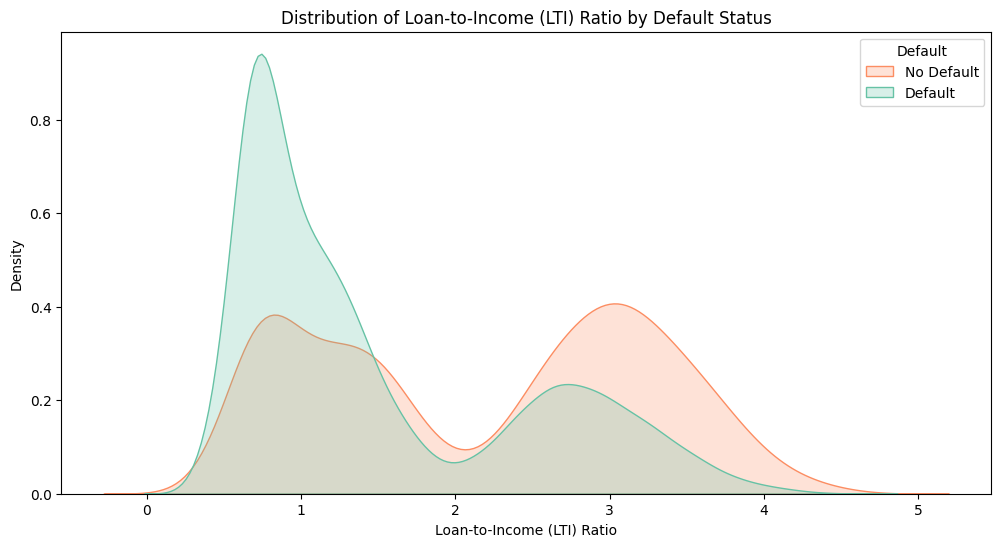

In [ ]:
# KDE Plot: Distribution of LTI by Default Status

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='lti', hue='default', fill=True, common_norm=False, palette='Set2')
plt.title('Distribution of Loan-to-Income (LTI) Ratio by Default Status')
plt.xlabel('Loan-to-Income (LTI) Ratio')
plt.ylabel('Density')
plt.legend(title='Default', labels=['No Default', 'Default'])
plt.show()

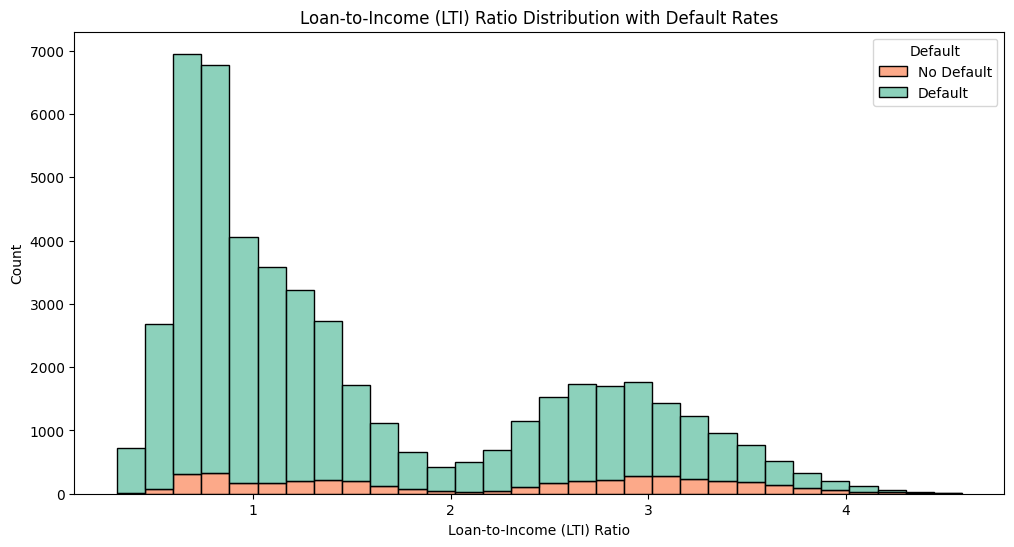

In [ ]:
# Histogram: LTI Distribution with Stacked Default Rates

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='lti', hue='default', multiple='stack', palette='Set2', bins=30)
plt.title('Loan-to-Income (LTI) Ratio Distribution with Default Rates')
plt.xlabel('Loan-to-Income (LTI) Ratio')
plt.ylabel('Count')
plt.legend(title='Default', labels=['No Default', 'Default'])
plt.show()

## **Calculate Delinquent Months to Loan Months Ratio**

In [ ]:
df['dmtlm'] = np.round((df['delinquent_months'] / df['total_loan_months']) * 100, 1)

df[['delinquent_months', 'total_loan_months', 'dmtlm']]

delinquent_months  total_loan_months  dmtlm
0                      0                 42    0.0
1                     12                 96   12.5
2                     24                 82   29.3
3                     15                115   13.0
4                      0                120    0.0
...                  ...                ...    ...
49419                  1                165    0.6
49420                  0                161    0.0
49421                  0                 42    0.0
49422                  9                 42   21.4
49423                 13                 65   20.0

[49424 rows x 3 columns]

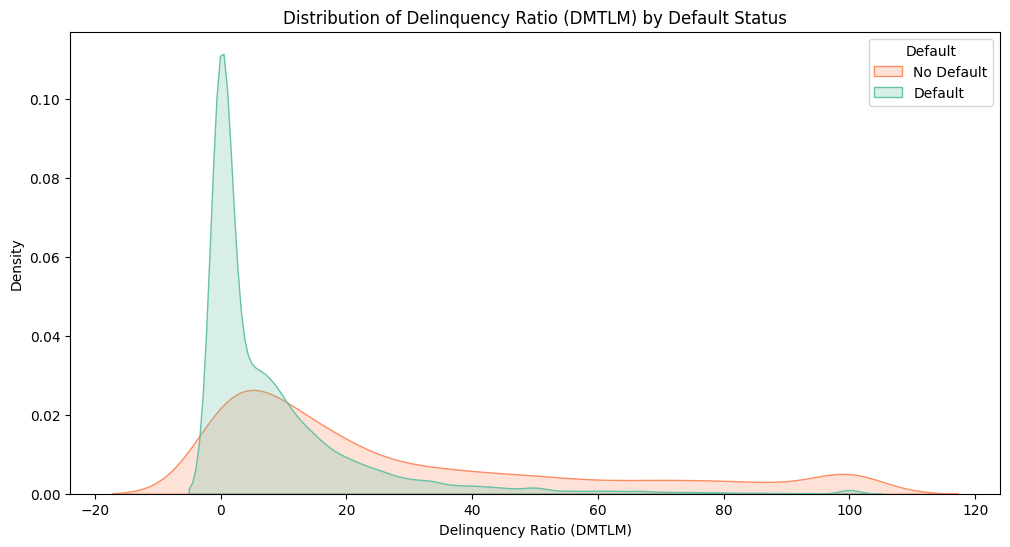

In [ ]:
# KDE Plot: Distribution of Delinquency Ratio by Default Status

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='dmtlm', hue='default', fill=True, common_norm=False, palette='Set2')
plt.title('Distribution of Delinquency Ratio (DMTLM) by Default Status')
plt.xlabel('Delinquency Ratio (DMTLM)')
plt.ylabel('Density')
plt.legend(title='Default', labels=['No Default', 'Default'])
plt.show()

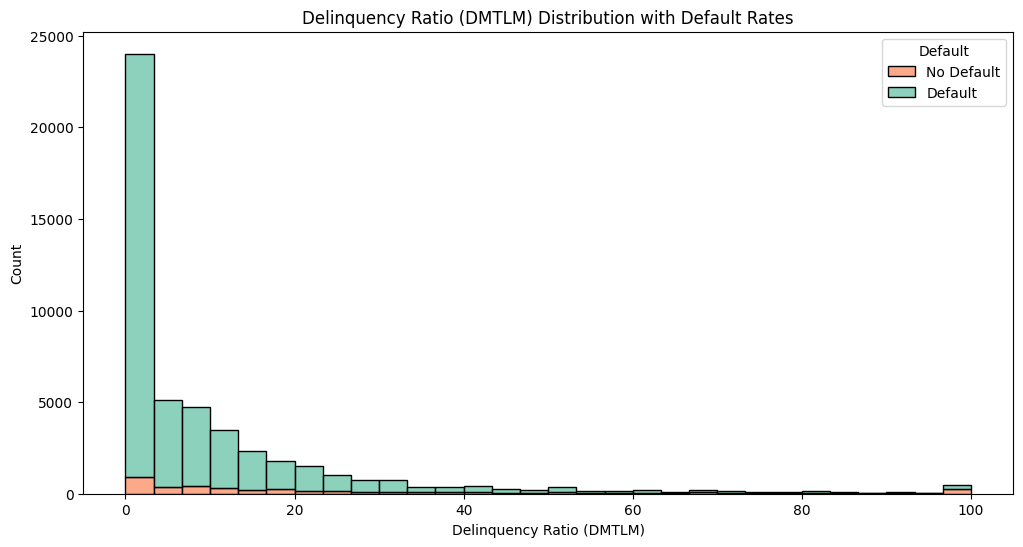

In [ ]:
# Histogram: Delinquency Ratio with Stacked Default Rates

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='dmtlm', hue='default', multiple='stack', palette='Set2', bins=30)
plt.title('Delinquency Ratio (DMTLM) Distribution with Default Rates')
plt.xlabel('Delinquency Ratio (DMTLM)')
plt.ylabel('Count')
plt.legend(title='Default', labels=['No Default', 'Default'])
plt.show()

## **Calculate Average Days Past Due (DPD) per Delinquent Month**

In [ ]:
# Calculate Average Days Past Due (DPD) per Delinquent Month
df['avg_dpd_per_dm'] = np.where(
    df['delinquent_months'] > 0,  # Check if delinquent_months is greater than 0
    np.round(df['total_dpd'] / df['delinquent_months'], 1),  # Calculate average
    0  # Default value for zero delinquent months
)

df[['total_dpd', 'delinquent_months', 'avg_dpd_per_dm']]

total_dpd  delinquent_months  avg_dpd_per_dm
0              0                  0             0.0
1             60                 12             5.0
2            147                 24             6.1
3             87                 15             5.8
4              0                  0             0.0
...          ...                ...             ...
49419          6                  1             6.0
49420          0                  0             0.0
49421          0                  0             0.0
49422         47                  9             5.2
49423         66                 13             5.1

[49424 rows x 3 columns]

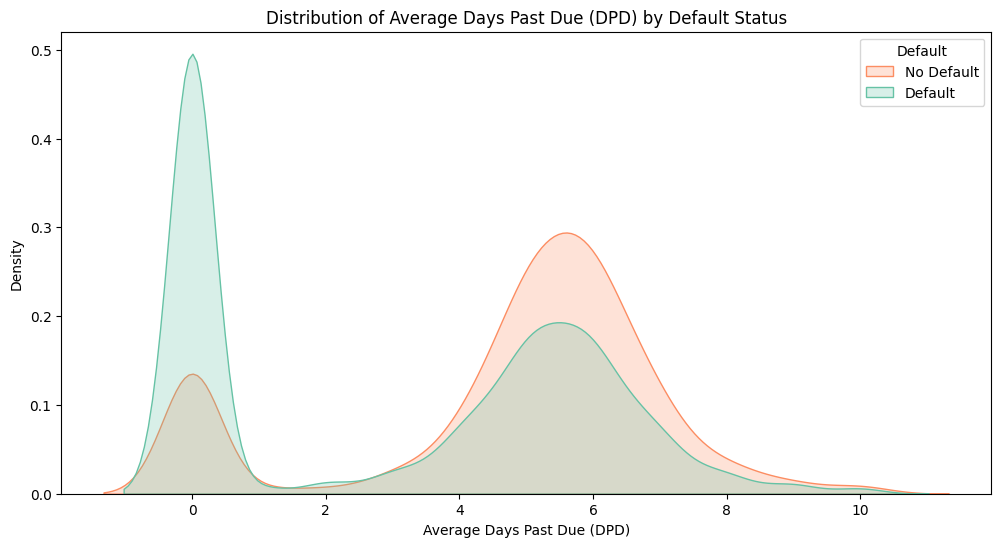

In [ ]:
# KDE Plot: Average DPD by Default Status

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='avg_dpd_per_dm', hue='default', fill=True, common_norm=False, palette='Set2')
plt.title('Distribution of Average Days Past Due (DPD) by Default Status')
plt.xlabel('Average Days Past Due (DPD)')
plt.ylabel('Density')
plt.legend(title='Default', labels=['No Default', 'Default'])
plt.show()

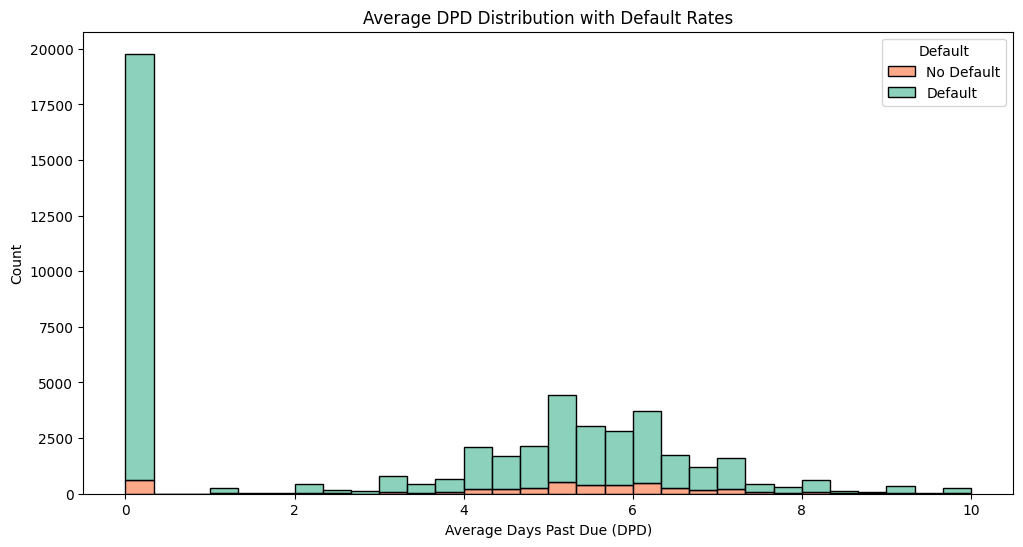

In [ ]:
# Histogram: Average DPD Distribution with Default Rates

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='avg_dpd_per_dm', hue='default', multiple='stack', bins=30, palette='Set2')
plt.title('Average DPD Distribution with Default Rates')
plt.xlabel('Average Days Past Due (DPD)')
plt.ylabel('Count')
plt.legend(title='Default', labels=['No Default', 'Default'])
plt.show()

## **Drop Irrelevant or Redundant Features**

In [ ]:
df.columns

Index(['cust_id', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'age', 'gender', 'marital_status',
       'employment_status', 'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_purpose',
       'loan_type', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'default', 'lti', 'dmtlm', 'avg_dpd_per_dm'],
      dtype='object')

In [ ]:
df = df.drop(['cust_id', 'city', 'state', 'zipcode'], axis = 1)
df.shape

(49424, 31)

In [ ]:
df.head()

number_of_open_accounts  number_of_closed_accounts  total_loan_months  \
0                        1                          1                 42   
1                        3                          1                 96   
2                        2                          1                 82   
3                        3                          0                115   
4                        4                          2                120   

   delinquent_months  total_dpd  enquiry_count  credit_utilization_ratio  age  \
0                  0          0              3                         7   44   
1                 12         60              5                         4   38   
2                 24        147              6                        58   46   
3                 15         87              5                        26   55   
4                  0          0              5                        10   37   

  gender marital_status  ... net_disbursement  loan_tenure_months  \
0      M        Married  ...          1973600                  33   
1      M        Married  ...          3106400                  30   
2      F        Married  ...          1736000                  21   
3      F         Single  ...          1397600                   6   
4      M        Married  ...          3616000                  28   

   principal_outstanding bank_balance_at_application  disbursal_date  \
0                1630408                      873386      2019-07-24   
1                 709309                      464100      2019-07-24   
2                1562399                     1476042      2019-07-24   
3                1257839                     1031094      2019-07-24   
4                1772334                     1032458      2019-07-24   

  installment_start_dt default   lti  dmtlm  avg_dpd_per_dm  
0           2019-08-10   False  0.95    0.0             0.0  
1           2019-08-15   False  3.22   12.5             5.0  
2           2019-08-21   False  0.75   29.3             6.1  
3           2019-08-09   False  0.49   13.0             5.8  
4           2019-08-02   False  1.32    0.0             0.0  

[5 rows x 31 columns]

In [ ]:
print(df.dtypes)

number_of_open_accounts          int64
number_of_closed_accounts        int64
total_loan_months                int64
delinquent_months                int64
total_dpd                        int64
enquiry_count                    int64
credit_utilization_ratio         int64
age                              int64
gender                          object
marital_status                  object
employment_status               object
income                           int64
number_of_dependants             int64
residence_type                  object
years_at_current_address         int64
loan_purpose                    object
loan_type                       object
sanction_amount                  int64
loan_amount                      int64
processing_fee                 float64
gst                              int64
net_disbursement                 int64
loan_tenure_months               int64
principal_outstanding            int64
bank_balance_at_application      int64
disbursal_date           

In [ ]:
df = df.drop(['disbursal_date', 'installment_start_dt'], axis = 1)
df.columns

Index(['number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'age', 'gender', 'marital_status',
       'employment_status', 'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'loan_purpose', 'loan_type',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'lti', 'dmtlm',
       'avg_dpd_per_dm'],
      dtype='object')

In [ ]:
df.shape

(49424, 29)

## **Handle Multicollinearity with Variance Inflation Factor (VIF)**

In [ ]:
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calculate_vif(data):
    """
    Calculate the Variance Inflation Factor (VIF) for each feature in a given dataset.

    Parameters:
    ----------
    data : pandas.DataFrame
        A DataFrame containing the numerical features for which VIF needs to be calculated.

    Returns:
    -------
    pandas.DataFrame
        A DataFrame with two columns:
        - 'Feature': The name of the feature.
        - 'VIF': The calculated VIF value for that feature.

    Notes:
    ------
    - High VIF values (commonly >5 or >10) indicate multicollinearity among features.
    - Ensure the input DataFrame `data` contains only numerical features, as VIF is not defined for categorical data.
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

In [ ]:
X = df.drop('default', axis = 1)
y = df['default']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((37068, 28), (12356, 28))

In [ ]:
# Select numerical columns for VIF calculation

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train_num = X_train[numerical_cols]

In [ ]:
vif_unscaled = calculate_vif(X_train_num)
print("VIF for Unscaled Data:")
print(vif_unscaled)

VIF for Unscaled Data:
                        Feature         VIF
0       number_of_open_accounts   17.412217
1     number_of_closed_accounts    2.429433
2             total_loan_months   11.465840
3             delinquent_months   49.570917
4                     total_dpd   51.667384
5                 enquiry_count    9.561676
6      credit_utilization_ratio    3.024176
7                           age   12.655543
8                        income   37.489136
9          number_of_dependants    2.780391
10     years_at_current_address    3.896752
11              sanction_amount  102.909575
12                  loan_amount         inf
13               processing_fee         inf
14                          gst         inf
15             net_disbursement         inf
16           loan_tenure_months    9.238045
17        principal_outstanding   29.377223
18  bank_balance_at_application   17.243278
19                          lti    9.382100
20                        dmtlm    2.703697
21       

In [ ]:
X_train.drop(['number_of_open_accounts', 'delinquent_months', 'total_dpd', 'sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'principal_outstanding',
              'bank_balance_at_application'], axis = 1, inplace=True)

In [ ]:
X_train.shape

(37068, 19)

In [ ]:
# Select numerical columns for VIF calculation

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train_num = X_train[numerical_cols]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
cols_to_scale = list(X_train_num.columns)

X_train_num[cols_to_scale] = scaler.fit_transform(X_train_num[cols_to_scale])

In [ ]:
vif_data_scaled = calculate_vif(X_train_num)
print("VIF for Scaled Data:")
print(vif_data_scaled)

VIF for Scaled Data:
                      Feature       VIF
0   number_of_closed_accounts  2.367931
1           total_loan_months  5.391406
2               enquiry_count  5.553270
3    credit_utilization_ratio  2.908105
4                         age  5.459904
5                      income  5.415007
6        number_of_dependants  2.731969
7    years_at_current_address  3.393153
8                 loan_amount  5.810920
9          loan_tenure_months  5.975978
10                        lti  6.774442
11                      dmtlm  2.070172
12             avg_dpd_per_dm  3.021293


In [ ]:
X_train.shape

(37068, 19)

In [ ]:
X_test.drop(['number_of_open_accounts', 'delinquent_months', 'total_dpd', 'sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'principal_outstanding',
              'bank_balance_at_application'], axis = 1, inplace=True)
X_test.shape

(12356, 19)

In [ ]:
print(X_train.dtypes)

number_of_closed_accounts      int64
total_loan_months              int64
enquiry_count                  int64
credit_utilization_ratio       int64
age                            int64
gender                        object
marital_status                object
employment_status             object
income                         int64
number_of_dependants           int64
residence_type                object
years_at_current_address       int64
loan_purpose                  object
loan_type                     object
loan_amount                    int64
loan_tenure_months             int64
lti                          float64
dmtlm                        float64
avg_dpd_per_dm               float64
dtype: object


## **Select Features Based on Information Value (IV)**

In [ ]:
def calculate_iv_for_train(X_train, y_train):
    """
    Calculate Information Value (IV) for all features in the training set.

    Parameters:
    - X_train (pd.DataFrame): Training dataset (features only).
    - y_train (pd.Series): Training target variable.

    Returns:
    - iv_data (pd.DataFrame): DataFrame with feature names and their IV values.
    """
    iv_list = []

    for col in X_train.columns:
        # Bin numerical variables or use categories for categorical features
        if X_train[col].dtype == 'object' or X_train[col].nunique() <= 10:
            X_train[col] = X_train[col].astype(str)
            bins = X_train[col]
        else:
            bins = pd.qcut(X_train[col], q=10, duplicates='drop')  # Quantile-based binning

        # Calculate WOE and IV
        temp_df = pd.DataFrame({'bin': bins, 'target': y_train})
        grouped = temp_df.groupby('bin')['target']
        stats = grouped.agg(['count', 'sum'])
        stats.columns = ['total', 'bad']
        stats['good'] = stats['total'] - stats['bad']
        stats['good_dist'] = stats['good'] / stats['good'].sum()
        stats['bad_dist'] = stats['bad'] / stats['bad'].sum()
        stats['woe'] = np.log(stats['good_dist'] / stats['bad_dist'].replace(0, np.nan)).replace(np.nan, 0)
        stats['iv'] = (stats['good_dist'] - stats['bad_dist']) * stats['woe']
        iv = stats['iv'].sum()

        iv_list.append({'Feature': col, 'IV': np.round(iv, 2)})

    iv_data = pd.DataFrame(iv_list).sort_values(by='IV', ascending=False).reset_index(drop=True)
    return iv_data



iv_data = calculate_iv_for_train(X_train, y_train)

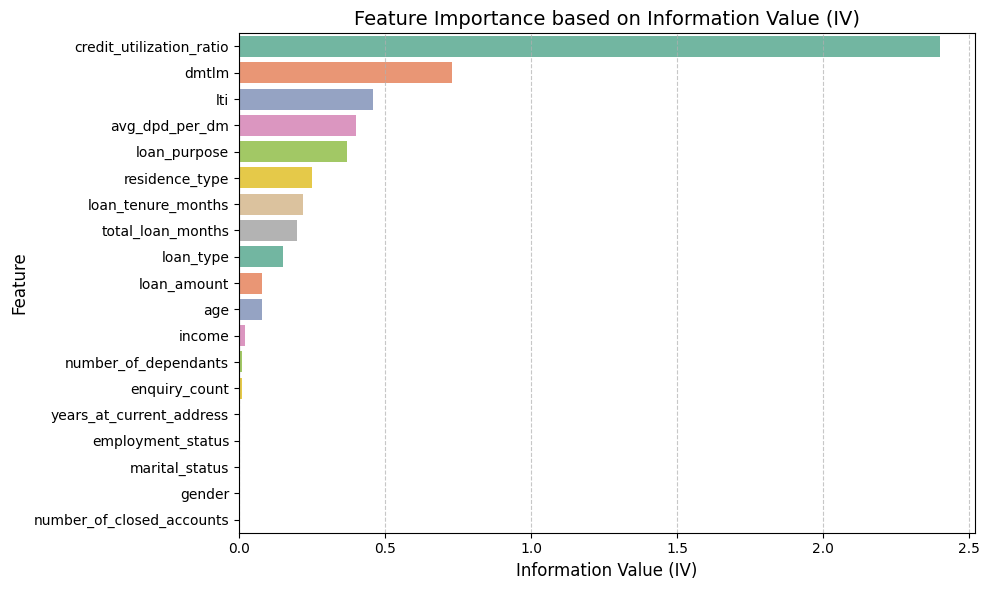

In [ ]:
def plot_iv_bar_chart(iv_data):
    """
    Plot a bar chart to visualize features and their Information Value (IV).

    Parameters:
    - iv_data (pd.DataFrame): DataFrame with 'Feature' and 'IV' columns.

    Returns:
    - None
    """
    # Sort IV data for better visualization
    iv_data_sorted = iv_data.sort_values(by='IV', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=iv_data_sorted, x='IV', y='Feature', palette='Set2')

    plt.title('Feature Importance based on Information Value (IV)', fontsize=14)
    plt.xlabel('Information Value (IV)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



plot_iv_bar_chart(iv_data)

In [ ]:
print(iv_data)

                      Feature    IV
0    credit_utilization_ratio  2.40
1                       dmtlm  0.73
2                         lti  0.46
3              avg_dpd_per_dm  0.40
4                loan_purpose  0.37
5              residence_type  0.25
6          loan_tenure_months  0.22
7           total_loan_months  0.20
8                   loan_type  0.15
9                         age  0.08
10                loan_amount  0.08
11                     income  0.02
12       number_of_dependants  0.01
13              enquiry_count  0.01
14   years_at_current_address  0.00
15          employment_status  0.00
16             marital_status  0.00
17                     gender  0.00
18  number_of_closed_accounts  0.00


In [ ]:
# Select features with IV >= 0.02
selected_features = iv_data[iv_data['IV'] >= 0.02]['Feature'].tolist()

# Filter features in training and test sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("Selected Features:", selected_features)

Selected Features: ['credit_utilization_ratio', 'dmtlm', 'lti', 'avg_dpd_per_dm', 'loan_purpose', 'residence_type', 'loan_tenure_months', 'total_loan_months', 'loan_type', 'age', 'loan_amount', 'income']


In [ ]:
X_train_selected.shape, X_test_selected.shape

((37068, 12), (12356, 12))

## **Encoding (One-Hot) Categorical Variables and Scaling the Numeric Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
cat_cols = ['loan_purpose', 'loan_type', 'residence_type']

num_cols = ['age', 'avg_dpd_per_dm', 'credit_utilization_ratio', 'dmtlm', 'income', 'loan_amount', 'loan_tenure_months', 'lti', 'total_loan_months']

In [ ]:
for column in cat_cols:
  print(f"For column -> {column} unique values in training data are: {X_train_selected[column].unique().tolist()} and in test data are: {X_test_selected[column].unique().tolist()}\n")

For column -> loan_purpose unique values in training data are: ['Auto', 'Home', 'Personal', 'Education'] and in test data are: ['Home', 'Auto', 'Education', 'Personal']

For column -> loan_type unique values in training data are: ['Secured', 'Unsecured'] and in test data are: ['Secured', 'Unsecured']

For column -> residence_type unique values in training data are: ['Owned', 'Mortgage', 'Rented'] and in test data are: ['Mortgage', 'Owned', 'Rented']



In [ ]:
# One-hot encode training data
X_train_encoded = pd.get_dummies(X_train_selected, columns=cat_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_selected, columns=cat_cols, drop_first=True)

In [ ]:
# Align test data columns with training data columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [ ]:
X_train_encoded.head()

credit_utilization_ratio  dmtlm   lti  avg_dpd_per_dm  \
21365                        27   28.6  1.34             4.4   
28459                        36   40.0  2.86             5.5   
32610                        11    8.8  3.12             4.7   
19972                        10   26.5  0.56             5.8   
42168                        13   40.4  1.18             5.4   

       loan_tenure_months  total_loan_months  age  loan_amount   income  \
21365                  20                 28   33      5298000  3940000   
28459                  30                 10   44      6222000  2175000   
32610                  35                113   33      2981000   954000   
19972                  19                 83   60       558000  1005000   
42168                  12                 47   34      4138000  3512000   

       loan_purpose_Education  loan_purpose_Home  loan_purpose_Personal  \
21365                   False              False                  False   
28459                   False               True                  False   
32610                   False               True                  False   
19972                   False              False                   True   
42168                   False              False                  False   

       loan_type_Unsecured  residence_type_Owned  residence_type_Rented  
21365                False                  True                  False  
28459                False                  True                  False  
32610                False                 False                  False  
19972                 True                 False                   True  
42168                False                 False                   True

In [ ]:
X_train_encoded.columns

Index(['credit_utilization_ratio', 'dmtlm', 'lti', 'avg_dpd_per_dm',
       'loan_tenure_months', 'total_loan_months', 'age', 'loan_amount',
       'income', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured', 'residence_type_Owned',
       'residence_type_Rented'],
      dtype='object')

In [ ]:
X_test_encoded.head()

credit_utilization_ratio  dmtlm   lti  avg_dpd_per_dm  \
31542                        35   16.7  2.74             5.2   
25501                        17    5.4  3.66             6.2   
1536                         92   13.1  1.23             6.4   
13373                        27    2.1  1.56             5.2   
19409                        58    0.0  0.64             0.0   

       loan_tenure_months  total_loan_months  age  loan_amount   income  \
31542                  48                 24   44      2505000   915000   
25501                  41                148   29      2990000   817000   
1536                   21                153   48      3853000  3125000   
13373                  52                187   43      3574000  2295000   
19409                  19                150   55      1147000  1781000   

       loan_purpose_Education  loan_purpose_Home  loan_purpose_Personal  \
31542                   False               True                  False   
25501                   False               True                  False   
1536                    False              False                  False   
13373                    True              False                  False   
19409                   False              False                   True   

       loan_type_Unsecured  residence_type_Owned  residence_type_Rented  
31542                False                 False                  False  
25501                False                  True                  False  
1536                 False                  True                  False  
13373                False                  True                  False  
19409                 True                  True                  False

In [ ]:
X_train_encoded.columns == X_test_encoded.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_train_encoded[num_cols] = scaler.fit_transform(X_train_encoded[num_cols])
X_test_encoded[num_cols] = scaler.transform(X_test_encoded[num_cols])

In [ ]:
X_train_encoded.head()

credit_utilization_ratio     dmtlm       lti  avg_dpd_per_dm  \
21365                 -0.557548  1.048595 -0.224482        0.374938   
28459                 -0.251074  1.706827  1.340334        0.753380   
32610                 -1.102391 -0.094651  1.608000        0.478149   
19972                 -1.136443  0.927341 -1.027480        0.856591   
42168                 -1.034285  1.729923 -0.389200        0.718976   

       loan_tenure_months  total_loan_months       age  loan_amount    income  \
21365           -0.475535          -1.099974 -0.667418     0.281692  0.563716   
28459            0.328417          -1.511337  0.453180     0.464092 -0.149526   
32610            0.730393           0.842569 -0.667418    -0.175691 -0.642936   
19972           -0.555930           0.156966  2.083140    -0.653998 -0.622327   
42168           -1.118697          -0.665759 -0.565545     0.052705  0.390760   

       loan_purpose_Education  loan_purpose_Home  loan_purpose_Personal  \
21365                   False              False                  False   
28459                   False               True                  False   
32610                   False               True                  False   
19972                   False              False                   True   
42168                   False              False                  False   

       loan_type_Unsecured  residence_type_Owned  residence_type_Rented  
21365                False                  True                  False  
28459                False                  True                  False  
32610                False                 False                  False  
19972                 True                 False                   True  
42168                False                 False                   True

In [ ]:
X_test_encoded.head()

credit_utilization_ratio     dmtlm       lti  avg_dpd_per_dm  \
31542                 -0.285127  0.361492  1.216795        0.650168   
25501                 -0.898075 -0.290966  2.163921        0.994206   
1536                   1.655874  0.153630 -0.337726        1.063014   
13373                 -0.557548 -0.481507  0.002004        0.650168   
19409                  0.498084 -0.602760 -0.945121       -1.138829   

       loan_tenure_months  total_loan_months       age  loan_amount    income  \
31542            1.775531          -1.191388  0.453180    -0.269655 -0.658696   
25501            1.212764           1.642440 -1.074908    -0.173914 -0.698298   
1536            -0.395140           1.756707  0.860670    -0.003555  0.234372   
13373            2.097112           2.533725  0.351307    -0.058631 -0.101034   
19409           -0.555930           1.688147  1.573778    -0.537728 -0.308743   

       loan_purpose_Education  loan_purpose_Home  loan_purpose_Personal  \
31542                   False               True                  False   
25501                   False               True                  False   
1536                    False              False                  False   
13373                    True              False                  False   
19409                   False              False                   True   

       loan_type_Unsecured  residence_type_Owned  residence_type_Rented  
31542                False                 False                  False  
25501                False                  True                  False  
1536                 False                  True                  False  
13373                False                  True                  False  
19409                 True                  True                  False

In [ ]:
# Save the model preparation details for deployment
model_data = {
    'model': None,  # Replace with your trained model later
    'scaler': scaler,
    'features': X_train_encoded.columns.tolist(),
    'cols_to_scale': num_cols,
}

# joblib.dump(model_data, "model_data.pkl")

# **Model Building and Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **Build Baseline Models**

In [ ]:
def build_evaluate_model(model, model_name, train_x, train_y, test_x, test_y):
  model_ = model.fit(train_x, train_y)
  print(f"Training Score for {model_name}: {model_.score(train_x, train_y)}\n")

  pred = model_.predict(test_x)

  print(f"Accuracy Score for {model_name}: {accuracy_score(test_y, pred)}\n")

  print(f"Classification Report for {model_name}\n: {classification_report(test_y, pred)}\n")

  sns.heatmap(confusion_matrix(test_y, pred), annot = True, fmt = 'd', cmap='Blues', cbar=False)
  plt.title(f"Confusion Matrix for {model_name}")
  plt.show()

  return model_

In [ ]:
from sklearn.linear_model import LogisticRegression

Training Score for Logistic Regression: 0.961826912700982

Accuracy Score for Logistic Regression: 0.9618808675946908

Classification Report for Logistic Regression
:               precision    recall  f1-score   support

       False       0.97      0.98      0.98     11298
        True       0.82      0.72      0.76      1058

    accuracy                           0.96     12356
   macro avg       0.89      0.85      0.87     12356
weighted avg       0.96      0.96      0.96     12356




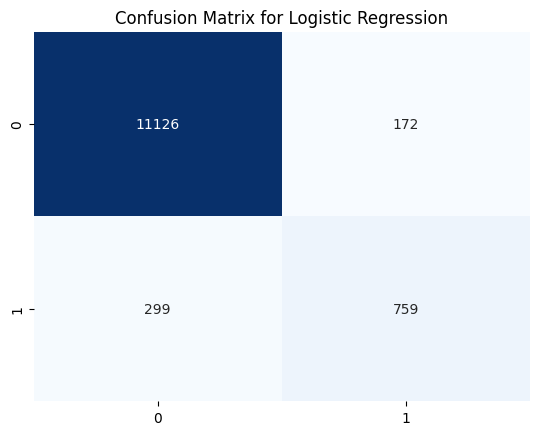

In [ ]:
lr_model = build_evaluate_model(model = LogisticRegression(), model_name = 'Logistic Regression', train_x = X_train_encoded, train_y = y_train,
                                test_x = X_test_encoded, test_y = y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Training Score for Random Forest: 1.0

Accuracy Score for Random Forest: 0.9606668824862415

Classification Report for Random Forest
:               precision    recall  f1-score   support

       False       0.97      0.99      0.98     11298
        True       0.82      0.70      0.75      1058

    accuracy                           0.96     12356
   macro avg       0.89      0.84      0.87     12356
weighted avg       0.96      0.96      0.96     12356




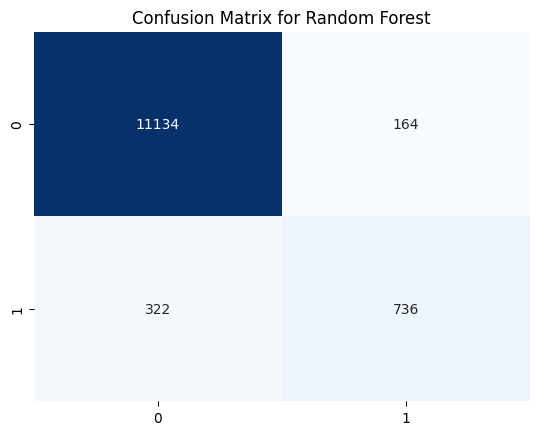

In [ ]:
rf_model = build_evaluate_model(model = RandomForestClassifier(), model_name = 'Random Forest', train_x = X_train_encoded, train_y = y_train,
                                test_x = X_test_encoded, test_y = y_test)

In [ ]:
from xgboost import XGBClassifier

Training Score for Extreme Gradient Boost: 0.996169202546671

Accuracy Score for Extreme Gradient Boost: 0.9609096795079314

Classification Report for Extreme Gradient Boost
:               precision    recall  f1-score   support

       False       0.98      0.98      0.98     11298
        True       0.78      0.76      0.77      1058

    accuracy                           0.96     12356
   macro avg       0.88      0.87      0.87     12356
weighted avg       0.96      0.96      0.96     12356




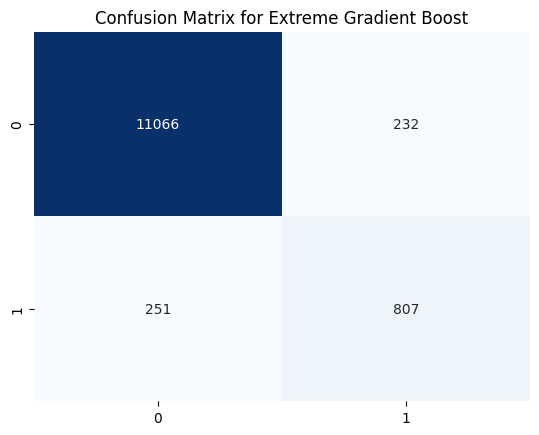

In [ ]:
xgb_model = build_evaluate_model(model = XGBClassifier(), model_name = 'Extreme Gradient Boost', train_x = X_train_encoded, train_y = y_train,
                                 test_x = X_test_encoded, test_y = y_test)

## **Hyperparameter Tuning with Randomized Search CV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Logistic Regression Parameter Grid
logistic_params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 200, 500]
}

# Random Forest Parameter Grid
random_forest_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


# XGBoost Parameter Grid
xgboost_params = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'lambda': [1, 1.5, 2]
}

In [ ]:
# RandomizedSearchCV Initialization
models = {
    'Logistic Regression': (LogisticRegression(), logistic_params),
    'Random Forest': (RandomForestClassifier(), random_forest_params),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params)
}

In [ ]:
random_search_results = {}

for model_name, (model, param_grid) in models.items():
    print(f"Starting RandomizedSearchCV for {model_name}...")

    # Define n_iter dynamically
    n_iter = 10 if model_name == 'Random Forest' else 50

    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=n_iter,
        scoring='accuracy',
        cv=5,
        verbose=2,
        random_state=42,
        n_jobs=-1
    )

    # Fit the model
    random_search.fit(X_train_encoded, y_train)

    # Store the best parameters
    random_search_results[model_name] = random_search.best_params_
    print(f"Best parameters for {model_name}: {random_search.best_params_}")

    # Save the best model
    joblib.dump(random_search.best_estimator_, f"{model_name}_best_model.pkl")
    print(f"Best model for {model_name} saved as '{model_name}_best_model.pkl'.")

Starting RandomizedSearchCV for Logistic Regression...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 500, 'C': 0.08858667904100823}
Best model for Logistic Regression saved as 'Logistic Regression_best_model.pkl'.
Starting RandomizedSearchCV for Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}
Best model for Random Forest saved as 'Random Forest_best_model.pkl'.
Starting RandomizedSearchCV for XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for XGBoost: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'lambda': 1.5, 'gamma': 5, 'colsample_bytree': 0.8}
Best model for XGBoost saved as 'XGBoost_best_model.pkl'.



Evaluating Logistic Regression on test data...

Accuracy for Logistic Regression: 0.9613
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

       False       0.97      0.98      0.98     11298
        True       0.81      0.71      0.76      1058

    accuracy                           0.96     12356
   macro avg       0.89      0.85      0.87     12356
weighted avg       0.96      0.96      0.96     12356



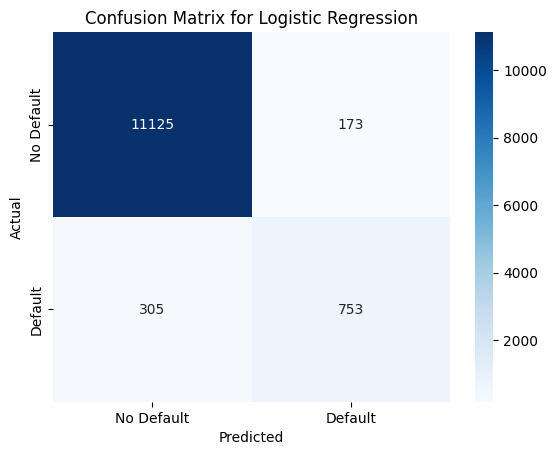


Evaluating Random Forest on test data...

Accuracy for Random Forest: 0.9617
Classification Report for Random Forest:

              precision    recall  f1-score   support

       False       0.97      0.98      0.98     11298
        True       0.82      0.71      0.76      1058

    accuracy                           0.96     12356
   macro avg       0.89      0.85      0.87     12356
weighted avg       0.96      0.96      0.96     12356



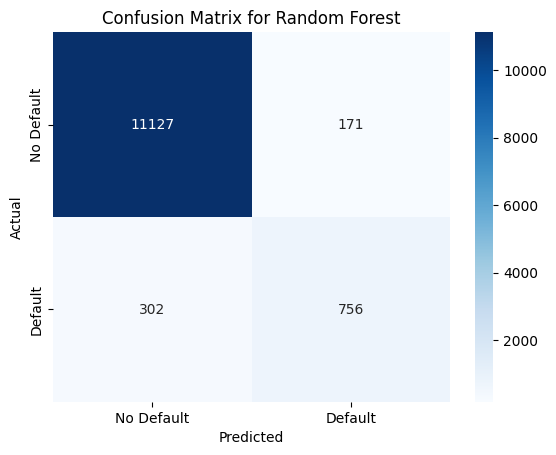


Evaluating XGBoost on test data...

Accuracy for XGBoost: 0.9656
Classification Report for XGBoost:

              precision    recall  f1-score   support

       False       0.98      0.99      0.98     11298
        True       0.83      0.75      0.79      1058

    accuracy                           0.97     12356
   macro avg       0.90      0.87      0.89     12356
weighted avg       0.96      0.97      0.96     12356



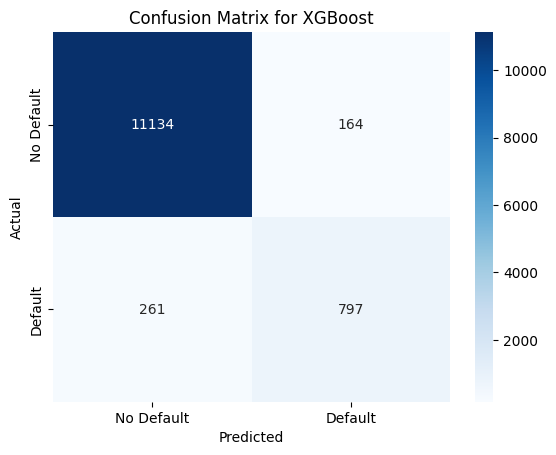

In [ ]:
saved_models = ['Logistic Regression_best_model.pkl', 'Random Forest_best_model.pkl', 'XGBoost_best_model.pkl']

for model_file in saved_models:
    # Extract the model name from the file name
    model_name = model_file.split('_best_model.pkl')[0]
    print(f"\nEvaluating {model_name} on test data...\n")

    # Load the saved model
    best_model = joblib.load(model_file)

    # Predict on the test data
    y_pred = best_model.predict(X_test_encoded)

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.4f}")

    # Classification Report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=["No Default", "Default"],
                yticklabels=["No Default", "Default"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## **Hyperparameter Tuning with Optuna**

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

In [ ]:
def objective_logreg(trial):
    # Define hyperparameter search space
    C = trial.suggest_loguniform("C", 1e-3, 1e3)
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"]) if solver != "saga" else "l2"

    # Create Logistic Regression model
    model = LogisticRegression(C=C, solver=solver, penalty=penalty, random_state=42, max_iter=1000)

    # Cross-validation score
    score = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='accuracy').mean()
    return score

In [ ]:
study_logreg = optuna.create_study(direction="maximize")
study_logreg.optimize(objective_logreg, n_trials=100)

print("Best hyperparameters for Logistic Regression:", study_logreg.best_params)
print("Best accuracy for Logistic Regression:", study_logreg.best_value)

[I 2024-12-07 08:55:26,870] A new study created in memory with name: no-name-869e41fc-114a-46fa-bc7d-519aa2aede28
[I 2024-12-07 08:55:27,980] Trial 0 finished with value: 0.9615031351356702 and parameters: {'C': 0.41180453318774923, 'solver': 'liblinear', 'penalty': 'l2'}. Best is trial 0 with value: 0.9615031351356702.
[I 2024-12-07 08:55:29,057] Trial 1 finished with value: 0.9605049579528611 and parameters: {'C': 0.02505291231909607, 'solver': 'saga'}. Best is trial 0 with value: 0.9615031351356702.
[I 2024-12-07 08:55:31,185] Trial 2 finished with value: 0.9616380187315199 and parameters: {'C': 21.477000274481835, 'solver': 'saga'}. Best is trial 2 with value: 0.9616380187315199.
[I 2024-12-07 08:55:34,337] Trial 3 finished with value: 0.9618268579491165 and parameters: {'C': 0.0693291398371253, 'solver': 'liblinear', 'penalty': 'l1'}. Best is trial 3 with value: 0.9618268579491165.
[I 2024-12-07 08:55:37,372] Trial 4 finished with value: 0.9464497422870334 and parameters: {'C': 0.

Best hyperparameters for Logistic Regression: {'C': 0.08481227674022526, 'solver': 'liblinear', 'penalty': 'l1'}
Best accuracy for Logistic Regression: 0.9621505844015742


In [ ]:
def objective_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 5, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    score = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='accuracy').mean()
    return score

In [ ]:
study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=50)

print("Best hyperparameters for Random Forest:", study_rf.best_params)
print("Best accuracy for Random Forest:", study_rf.best_value)

[I 2024-12-07 08:59:42,968] A new study created in memory with name: no-name-962665ec-5c76-439f-b550-826a7f81034e
[I 2024-12-07 09:00:05,192] Trial 0 finished with value: 0.9557568814342042 and parameters: {'n_estimators': 176, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9557568814342042.
[I 2024-12-07 09:00:46,690] Trial 1 finished with value: 0.9469083486963296 and parameters: {'n_estimators': 434, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9557568814342042.
[I 2024-12-07 09:01:57,893] Trial 2 finished with value: 0.9608016574677917 and parameters: {'n_estimators': 473, 'max_depth': 27, 'min_samples_split': 12, 'min_samples_leaf': 10}. Best is trial 2 with value: 0.9608016574677917.
[I 2024-12-07 09:02:02,932] Trial 3 finished with value: 0.9456133992183622 and parameters: {'n_estimators': 54, 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 8}. Best is trial 2 with value

Best hyperparameters for Random Forest: {'n_estimators': 396, 'max_depth': 17, 'min_samples_split': 16, 'min_samples_leaf': 1}
Best accuracy for Random Forest: 0.9622584665329768


In [ ]:
def objective_xgb(trial):
    eta = trial.suggest_loguniform("eta", 0.01, 0.5)  # Learning rate
    max_depth = trial.suggest_int("max_depth", 3, 10)
    subsample = trial.suggest_uniform("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_uniform("colsample_bytree", 0.5, 1.0)
    n_estimators = trial.suggest_int("n_estimators", 50, 700)

    model = XGBClassifier(
        eta=eta,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        n_estimators=n_estimators,
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    )

    score = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='accuracy').mean()
    return score

In [ ]:
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=50)

print("Best hyperparameters for XGBoost:", study_xgb.best_params)
print("Best accuracy for XGBoost:", study_xgb.best_value)

[I 2024-12-07 09:46:22,719] A new study created in memory with name: no-name-333dfe9a-87b3-4257-b5de-42ac0f3b66c7
[I 2024-12-07 09:46:51,343] Trial 0 finished with value: 0.9614222217176127 and parameters: {'eta': 0.20156808978726878, 'max_depth': 5, 'subsample': 0.77638514097771, 'colsample_bytree': 0.8976136802548357, 'n_estimators': 616}. Best is trial 0 with value: 0.9614222217176127.
[I 2024-12-07 09:47:08,468] Trial 1 finished with value: 0.96126032210127 and parameters: {'eta': 0.2841457093283366, 'max_depth': 6, 'subsample': 0.8943078730116405, 'colsample_bytree': 0.709821445499673, 'n_estimators': 579}. Best is trial 0 with value: 0.9614222217176127.
[I 2024-12-07 09:47:14,666] Trial 2 finished with value: 0.9612603766864407 and parameters: {'eta': 0.3170981880925198, 'max_depth': 8, 'subsample': 0.8673523508126606, 'colsample_bytree': 0.5852196306624147, 'n_estimators': 237}. Best is trial 0 with value: 0.9614222217176127.
[I 2024-12-07 09:47:23,201] Trial 3 finished with val

Best hyperparameters for XGBoost: {'eta': 0.0514502587866531, 'max_depth': 3, 'subsample': 0.6638708093805934, 'colsample_bytree': 0.7997421566949687, 'n_estimators': 520}
Best accuracy for XGBoost: 0.9656576597859875


In [ ]:
# Logistic Regression
best_logreg = LogisticRegression(**study_logreg.best_params, random_state=42, max_iter=1000)
best_logreg.fit(X_train_encoded, y_train)
print(f"Training Score: {best_logreg.score(X_train_encoded, y_train)}")

LogisticRegression(C=0.08481227674022526, max_iter=1000, penalty='l1',
                   random_state=42, solver='liblinear')

Training Score: 0.962204596956944


Accuracy on Test Data: 0.9616

Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.98      0.98     11298
        True       0.82      0.71      0.76      1058

    accuracy                           0.96     12356
   macro avg       0.89      0.85      0.87     12356
weighted avg       0.96      0.96      0.96     12356



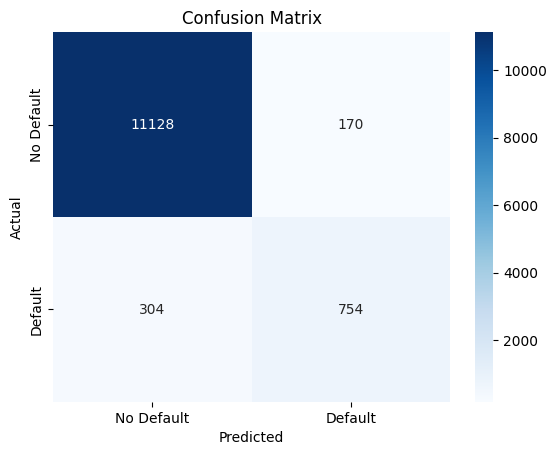

In [ ]:
y_pred = best_logreg.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Random Forest
best_rf = RandomForestClassifier(**study_rf.best_params, random_state=42)
best_rf.fit(X_train_encoded, y_train)
print(f"Training Score: {best_rf.score(X_train_encoded, y_train)}")

Training Score: 0.9833818927376713


Accuracy on Test Data: 0.9629

Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98     11298
        True       0.84      0.70      0.76      1058

    accuracy                           0.96     12356
   macro avg       0.91      0.84      0.87     12356
weighted avg       0.96      0.96      0.96     12356



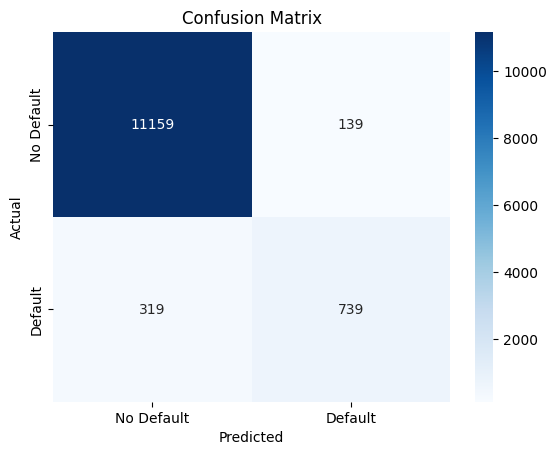

In [ ]:
y_pred = best_rf.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# XGBoost
best_xgb = XGBClassifier(**study_xgb.best_params, random_state=42, use_label_encoder=False, eval_metric="logloss")
best_xgb.fit(X_train_encoded, y_train)
print(f"Training Score: {best_xgb.score(X_train_encoded, y_train)}")

Training Score: 0.9721053199525197


Accuracy on Test Data: 0.9646

Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98     11298
        True       0.81      0.76      0.79      1058

    accuracy                           0.96     12356
   macro avg       0.90      0.87      0.88     12356
weighted avg       0.96      0.96      0.96     12356



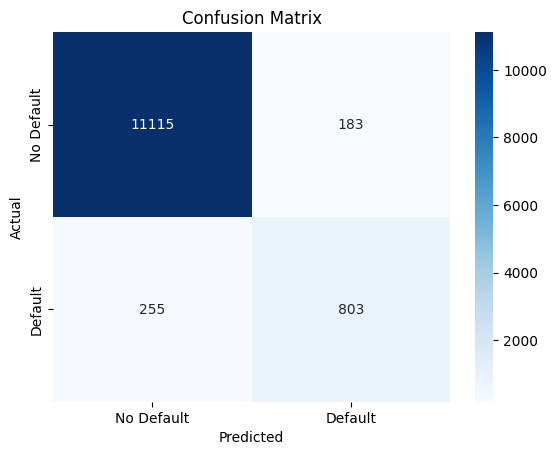

In [ ]:
y_pred = best_xgb.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Undersampling to Handle Class Imbalance**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
print("Class distribution before undersampling:")
print(Counter(y_train))

Class distribution before undersampling:
Counter({False: 33866, True: 3202})


In [ ]:
undersampler = RandomUnderSampler(random_state=42)

X_train_balanced_under, y_train_balanced_under = undersampler.fit_resample(X_train_encoded, y_train)

In [ ]:
print("\nClass distribution after undersampling:")
print(Counter(y_train_balanced_under))


Class distribution after undersampling:
Counter({False: 3202, True: 3202})


### **Baseline Models on Undersampled Data**

Training Score for Logistic Regression: 0.9376951905059338

Accuracy Score for Logistic Regression: 0.9206053739074134

Classification Report for Logistic Regression
:               precision    recall  f1-score   support

       False       1.00      0.92      0.95     11298
        True       0.52      0.96      0.67      1058

    accuracy                           0.92     12356
   macro avg       0.76      0.94      0.81     12356
weighted avg       0.96      0.92      0.93     12356




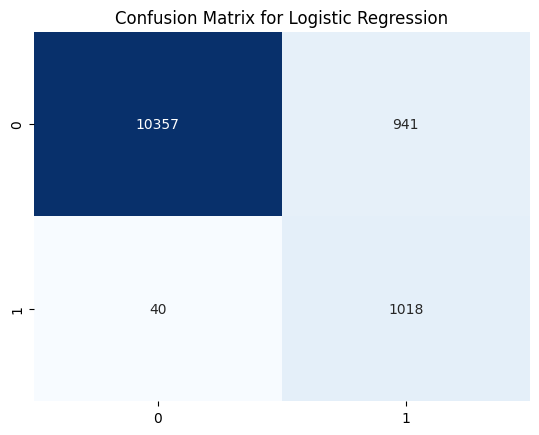

In [ ]:
lr_model_under = build_evaluate_model(model = LogisticRegression(), model_name = 'Logistic Regression', train_x = X_train_balanced_under, train_y = y_train_balanced_under,
                                      test_x = X_test_encoded, test_y = y_test)

Training Score for Random Forest: 1.0

Accuracy Score for Random Forest: 0.9144545160246035

Classification Report for Random Forest
:               precision    recall  f1-score   support

       False       1.00      0.91      0.95     11298
        True       0.50      0.97      0.66      1058

    accuracy                           0.91     12356
   macro avg       0.75      0.94      0.81     12356
weighted avg       0.95      0.91      0.93     12356




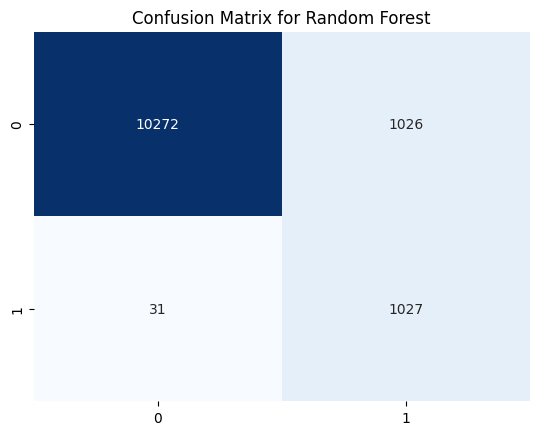

In [ ]:
rf_model_under = build_evaluate_model(model = RandomForestClassifier(), model_name = 'Random Forest', train_x = X_train_balanced_under, train_y = y_train_balanced_under,
                                      test_x = X_test_encoded, test_y = y_test)

Training Score for Extreme Gradient Boost: 1.0

Accuracy Score for Extreme Gradient Boost: 0.9269990288119132

Classification Report for Extreme Gradient Boost
:               precision    recall  f1-score   support

       False       1.00      0.92      0.96     11298
        True       0.54      0.96      0.69      1058

    accuracy                           0.93     12356
   macro avg       0.77      0.94      0.83     12356
weighted avg       0.96      0.93      0.94     12356




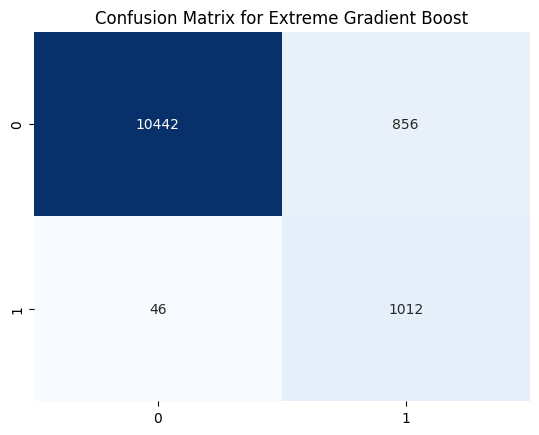

In [ ]:
xgb_model_under = build_evaluate_model(model = XGBClassifier(), model_name = 'Extreme Gradient Boost', train_x = X_train_balanced_under, train_y = y_train_balanced_under,
                                       test_x = X_test_encoded, test_y = y_test)

In [ ]:
joblib.dump(lr_model_under, "lr_model_under.pkl")
print("Model saved successfully.")

joblib.dump(xgb_model_under, "xgb_model_under.pkl")
print("Model saved successfully.")

Model saved successfully.
Model saved successfully.


### **Randomized Search CV on Undersampled Data**

In [ ]:
random_search_results_under = {}

for model_name, (model, param_grid) in models.items():
    print(f"Starting RandomizedSearchCV for {model_name}...")

    # Define n_iter dynamically
    n_iter = 10 if model_name == 'Random Forest' else 50

    # Initialize RandomizedSearchCV
    random_search_under = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=n_iter,
        scoring='accuracy',
        cv=5,
        verbose=2,
        random_state=42,
        n_jobs=-1
    )

    # Fit the model
    random_search_under.fit(X_train_balanced_under, y_train_balanced_under)

    # Store the best parameters
    random_search_results_under[model_name] = random_search_under.best_params_
    print(f"Best parameters for {model_name}: {random_search_under.best_params_}")

    # Save the best model
    joblib.dump(random_search_under.best_estimator_, f"{model_name}_best_model_under.pkl")
    print(f"Best model for {model_name} saved as '{model_name}_best_model_under.pkl'.")

Starting RandomizedSearchCV for Logistic Regression...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 200, 'C': 29.763514416313132}
Best model for Logistic Regression saved as 'Logistic Regression_best_model_under.pkl'.
Starting RandomizedSearchCV for Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}
Best model for Random Forest saved as 'Random Forest_best_model_under.pkl'.
Starting RandomizedSearchCV for XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'lambda': 2, 'gamma': 1, 'colsample_bytree': 0.8}
Best model for XGBoost saved as 'XGBoost_best_model_under.pkl'.



Evaluating Logistic Regression on test data...

Accuracy for Logistic Regression: 0.9222
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11298
        True       0.53      0.96      0.68      1058

    accuracy                           0.92     12356
   macro avg       0.76      0.94      0.82     12356
weighted avg       0.96      0.92      0.93     12356



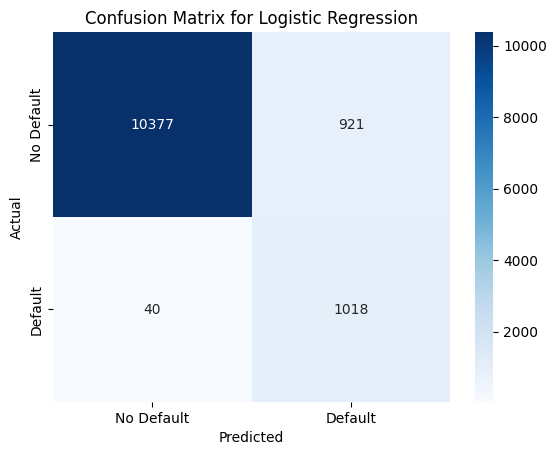


Evaluating Random Forest on test data...

Accuracy for Random Forest: 0.9155
Classification Report for Random Forest:

              precision    recall  f1-score   support

       False       1.00      0.91      0.95     11298
        True       0.50      0.97      0.66      1058

    accuracy                           0.92     12356
   macro avg       0.75      0.94      0.81     12356
weighted avg       0.95      0.92      0.93     12356



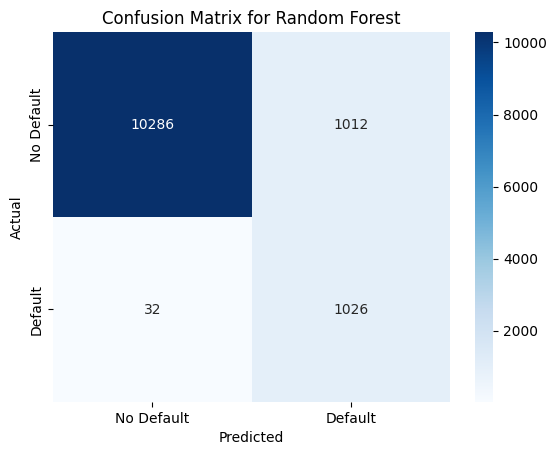


Evaluating XGBoost on test data...

Accuracy for XGBoost: 0.9284
Classification Report for XGBoost:

              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11298
        True       0.55      0.97      0.70      1058

    accuracy                           0.93     12356
   macro avg       0.77      0.95      0.83     12356
weighted avg       0.96      0.93      0.94     12356



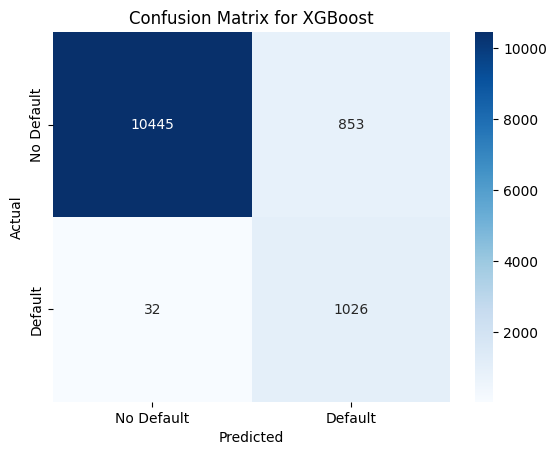

In [ ]:
saved_models_under = ['Logistic Regression_best_model_under.pkl', 'Random Forest_best_model_under.pkl', 'XGBoost_best_model_under.pkl']

for model_file in saved_models_under:
    # Extract the model name from the file name
    model_name = model_file.split('_best_model_under.pkl')[0]
    print(f"\nEvaluating {model_name} on test data...\n")

    # Load the saved model
    best_model = joblib.load(model_file)

    # Predict on the test data
    y_pred = best_model.predict(X_test_encoded)

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.4f}")

    # Classification Report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=["No Default", "Default"],
                yticklabels=["No Default", "Default"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

### **Optuna on Undersampled Data**

In [ ]:
def objective_logreg_under(trial):
    # Define hyperparameter search space
    C = trial.suggest_loguniform("C", 1e-3, 1e3)
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"]) if solver != "saga" else "l2"

    # Create Logistic Regression model
    model = LogisticRegression(C=C, solver=solver, penalty=penalty, random_state=42, max_iter=1000)

    # Cross-validation score
    score = cross_val_score(model, X_train_balanced_under, y_train_balanced_under, cv=5, scoring='accuracy').mean()
    return score

In [ ]:
study_logreg_under = optuna.create_study(direction="maximize")
study_logreg_under.optimize(objective_logreg_under, n_trials=100)

print("Best hyperparameters for Logistic Regression:", study_logreg_under.best_params)
print("Best accuracy for Logistic Regression:", study_logreg_under.best_value)

[I 2024-12-07 10:03:21,191] A new study created in memory with name: no-name-b32f972c-7ea5-4865-9fce-3d45d3f78f60
[I 2024-12-07 10:03:21,369] Trial 0 finished with value: 0.9355088797814208 and parameters: {'C': 0.15123641446761818, 'solver': 'liblinear', 'penalty': 'l2'}. Best is trial 0 with value: 0.9355088797814208.
[I 2024-12-07 10:03:21,774] Trial 1 finished with value: 0.9369142759562841 and parameters: {'C': 44.49916241136724, 'solver': 'liblinear', 'penalty': 'l1'}. Best is trial 1 with value: 0.9369142759562841.
[I 2024-12-07 10:03:21,962] Trial 2 finished with value: 0.937538788056206 and parameters: {'C': 3.865395573363244, 'solver': 'liblinear', 'penalty': 'l2'}. Best is trial 2 with value: 0.937538788056206.
[I 2024-12-07 10:03:22,157] Trial 3 finished with value: 0.9369137880562061 and parameters: {'C': 0.6142205602646228, 'solver': 'liblinear', 'penalty': 'l2'}. Best is trial 2 with value: 0.937538788056206.
[I 2024-12-07 10:03:22,345] Trial 4 finished with value: 0.936

Best hyperparameters for Logistic Regression: {'C': 3.942256011297306, 'solver': 'liblinear', 'penalty': 'l2'}
Best accuracy for Logistic Regression: 0.9376949160811867


In [ ]:
def objective_rf_under(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 5, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    score = cross_val_score(model, X_train_balanced_under, y_train_balanced_under, cv=5, scoring='accuracy').mean()
    return score

In [ ]:
study_rf_under = optuna.create_study(direction="maximize")
study_rf_under.optimize(objective_rf_under, n_trials=50)

print("Best hyperparameters for Random Forest:", study_rf_under.best_params)
print("Best accuracy for Random Forest:", study_rf_under.best_value)

[I 2024-12-07 10:05:37,416] A new study created in memory with name: no-name-0048d87c-a0dc-4a45-bff4-2fdda4ea4b93
[I 2024-12-07 10:05:46,803] Trial 0 finished with value: 0.9376947941061671 and parameters: {'n_estimators': 212, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9376947941061671.
[I 2024-12-07 10:05:49,473] Trial 1 finished with value: 0.9405053425058549 and parameters: {'n_estimators': 88, 'max_depth': 22, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9405053425058549.
[I 2024-12-07 10:05:54,156] Trial 2 finished with value: 0.9353525078064013 and parameters: {'n_estimators': 186, 'max_depth': 7, 'min_samples_split': 17, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9405053425058549.
[I 2024-12-07 10:06:16,327] Trial 3 finished with value: 0.939880830405933 and parameters: {'n_estimators': 475, 'max_depth': 11, 'min_samples_split': 14, 'min_samples_leaf': 3}. Best is trial 1 with value

Best hyperparameters for Random Forest: {'n_estimators': 171, 'max_depth': 16, 'min_samples_split': 13, 'min_samples_leaf': 1}
Best accuracy for Random Forest: 0.9431600068306011


In [ ]:
def objective_xgb_under(trial):
    eta = trial.suggest_loguniform("eta", 0.01, 0.5)  # Learning rate
    max_depth = trial.suggest_int("max_depth", 3, 10)
    subsample = trial.suggest_uniform("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_uniform("colsample_bytree", 0.5, 1.0)
    n_estimators = trial.suggest_int("n_estimators", 50, 700)

    model = XGBClassifier(
        eta=eta,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        n_estimators=n_estimators,
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    )

    score = cross_val_score(model, X_train_balanced_under, y_train_balanced_under, cv=5, scoring='accuracy').mean()
    return score

In [ ]:
study_xgb_under = optuna.create_study(direction="maximize")
study_xgb_under.optimize(objective_xgb_under, n_trials=50)

print("Best hyperparameters for XGBoost:", study_xgb_under.best_params)
print("Best accuracy for XGBoost:", study_xgb_under.best_value)

[I 2024-12-07 10:18:30,329] A new study created in memory with name: no-name-aa583fbc-c568-47e0-8533-8753327b2004
[I 2024-12-07 10:18:32,218] Trial 0 finished with value: 0.9415981167056987 and parameters: {'eta': 0.3079714292131622, 'max_depth': 8, 'subsample': 0.8616852396317867, 'colsample_bytree': 0.8791031928832043, 'n_estimators': 204}. Best is trial 0 with value: 0.9415981167056987.
[I 2024-12-07 10:18:36,604] Trial 1 finished with value: 0.9397251902810305 and parameters: {'eta': 0.0126829090963485, 'max_depth': 8, 'subsample': 0.5780995081366125, 'colsample_bytree': 0.7607704937071103, 'n_estimators': 84}. Best is trial 0 with value: 0.9415981167056987.
[I 2024-12-07 10:18:38,337] Trial 2 finished with value: 0.9525298838797814 and parameters: {'eta': 0.05147851585479972, 'max_depth': 3, 'subsample': 0.7954284690228846, 'colsample_bytree': 0.5221290128801271, 'n_estimators': 453}. Best is trial 2 with value: 0.9525298838797814.
[I 2024-12-07 10:18:42,624] Trial 3 finished with

Best hyperparameters for XGBoost: {'eta': 0.03962150782811734, 'max_depth': 3, 'subsample': 0.6272358596011762, 'colsample_bytree': 0.7136867658100697, 'n_estimators': 388}
Best accuracy for XGBoost: 0.953154761904762


In [ ]:
# Logistic Regression
best_logreg_under = LogisticRegression(**study_logreg_under.best_params, random_state=42, max_iter=1000)
best_logreg_under.fit(X_train_balanced_under, y_train_balanced_under)
print(f"Training Score: {best_logreg_under.score(X_train_balanced_under, y_train_balanced_under)}")

Training Score: 0.9376951905059338


Accuracy on Test Data: 0.9212

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11298
        True       0.52      0.96      0.68      1058

    accuracy                           0.92     12356
   macro avg       0.76      0.94      0.82     12356
weighted avg       0.96      0.92      0.93     12356



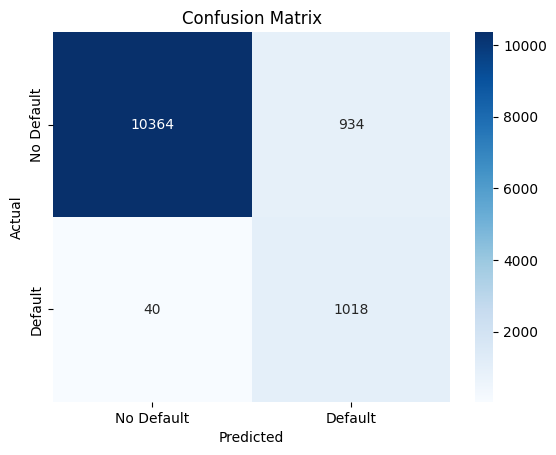

In [ ]:
y_pred = best_logreg_under.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Random Forest
best_rf_under = RandomForestClassifier(**study_rf_under.best_params, random_state=42)
best_rf_under.fit(X_train_balanced_under, y_train_balanced_under)
print(f"Training Score: {best_rf_under.score(X_train_balanced_under, y_train_balanced_under)}")

Training Score: 0.9806371018113679


Accuracy on Test Data: 0.9102

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.90      0.95     11298
        True       0.49      0.98      0.65      1058

    accuracy                           0.91     12356
   macro avg       0.74      0.94      0.80     12356
weighted avg       0.95      0.91      0.92     12356



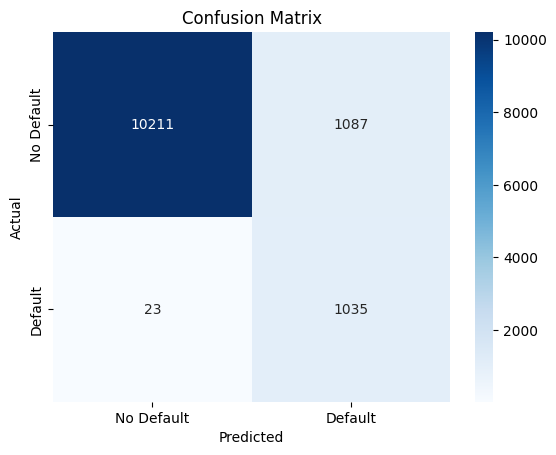

In [ ]:
y_pred = best_rf_under.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Random Forest
best_xgb_under = XGBClassifier(**study_xgb_under.best_params, random_state=42)
best_xgb_under.fit(X_train_balanced_under, y_train_balanced_under)
print(f"Training Score: {best_xgb_under.score(X_train_balanced_under, y_train_balanced_under)}")

Training Score: 0.9679887570268582


Accuracy on Test Data: 0.9246

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11298
        True       0.53      0.97      0.69      1058

    accuracy                           0.92     12356
   macro avg       0.76      0.95      0.82     12356
weighted avg       0.96      0.92      0.93     12356



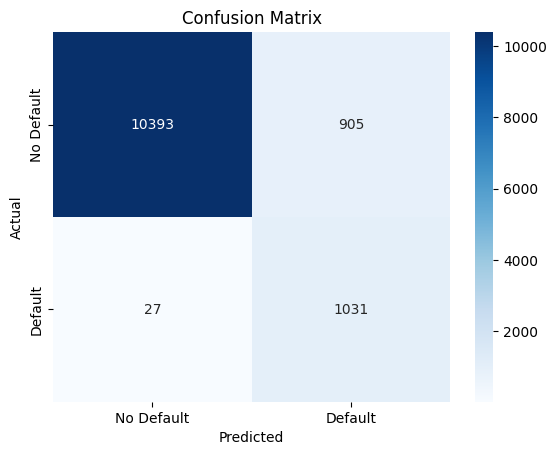

In [ ]:
y_pred = best_xgb_under.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
joblib.dump(best_logreg_under, "logreg_optuna_under.pkl")
print("Model saved successfully.")

joblib.dump(best_xgb_under, "xgb_optuna_under.pkl")
print("Model saved successfully.")

Model saved successfully.
Model saved successfully.


## **Oversampling to Handle Class Imbalance**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
print("Class distribution before oversampling:")
print(Counter(y_train))

Class distribution before oversampling:
Counter({False: 33866, True: 3202})


In [ ]:
smote = SMOTE(random_state=42)

X_train_balanced_over, y_train_balanced_over = smote.fit_resample(X_train_encoded, y_train)

In [ ]:
print("\nClass distribution after oversampling:")
print(Counter(y_train_balanced_over))


Class distribution after oversampling:
Counter({False: 33866, True: 33866})


### **Baseline Models on Oversampled Data**

Training Score for Logistic Regression: 0.9445609165534755

Accuracy Score for Logistic Regression: 0.9290223373259955

Classification Report for Logistic Regression
:               precision    recall  f1-score   support

       False       0.99      0.93      0.96     11298
        True       0.55      0.95      0.70      1058

    accuracy                           0.93     12356
   macro avg       0.77      0.94      0.83     12356
weighted avg       0.96      0.93      0.94     12356




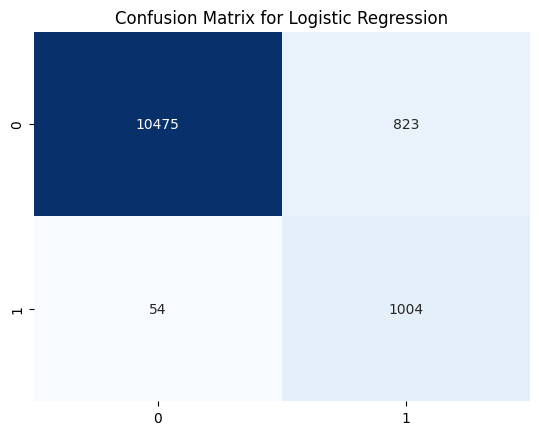

In [ ]:
lr_model_over = build_evaluate_model(model = LogisticRegression(), model_name = 'Logistic Regression', train_x = X_train_balanced_over, train_y = y_train_balanced_over,
                                     test_x = X_test_encoded, test_y = y_test)

Training Score for Random Forest: 0.9999852359298411

Accuracy Score for Random Forest: 0.9499838135318873

Classification Report for Random Forest
:               precision    recall  f1-score   support

       False       0.99      0.96      0.97     11298
        True       0.66      0.87      0.75      1058

    accuracy                           0.95     12356
   macro avg       0.82      0.91      0.86     12356
weighted avg       0.96      0.95      0.95     12356




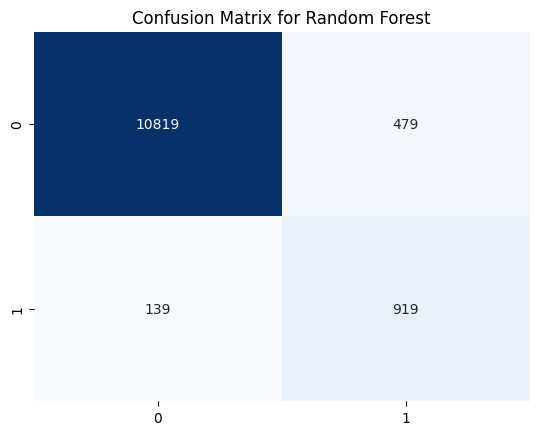

In [ ]:
rf_model_over = build_evaluate_model(model = RandomForestClassifier(), model_name = 'Random Forest', train_x = X_train_balanced_over, train_y = y_train_balanced_over,
                                     test_x = X_test_encoded, test_y = y_test)

Training Score for Extreme Gradient Boost: 0.9933856965688301

Accuracy Score for Extreme Gradient Boost: 0.9550825509873746

Classification Report for Extreme Gradient Boost
:               precision    recall  f1-score   support

       False       0.98      0.97      0.98     11298
        True       0.70      0.83      0.76      1058

    accuracy                           0.96     12356
   macro avg       0.84      0.90      0.87     12356
weighted avg       0.96      0.96      0.96     12356




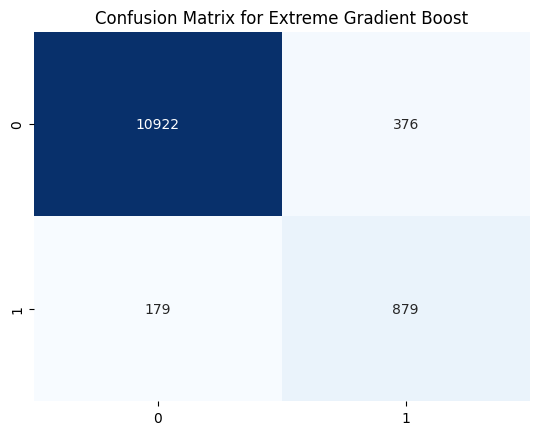

In [ ]:
xgb_model_over = build_evaluate_model(model = XGBClassifier(), model_name = 'Extreme Gradient Boost', train_x = X_train_balanced_over, train_y = y_train_balanced_over,
                                      test_x = X_test_encoded, test_y = y_test)

In [ ]:
joblib.dump(lr_model_over, "lr_model_over.pkl")
print("Model saved successfully.")

Model saved successfully.


### **Randomized Search CV on Oversampled Data**

In [ ]:
random_search_results_over = {}

for model_name, (model, param_grid) in models.items():
    print(f"Starting RandomizedSearchCV for {model_name}...")

    # Define n_iter dynamically
    n_iter = 10 if model_name == 'Random Forest' else 50

    # Initialize RandomizedSearchCV
    random_search_over = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=n_iter,
        scoring='accuracy',
        cv=5,
        verbose=2,
        random_state=42,
        n_jobs=-1
    )

    # Fit the model
    random_search_over.fit(X_train_balanced_over, y_train_balanced_over)

    # Store the best parameters
    random_search_results_over[model_name] = random_search_over.best_params_
    print(f"Best parameters for {model_name}: {random_search_over.best_params_}")

    # Save the best model
    joblib.dump(random_search_over.best_estimator_, f"{model_name}_best_model_over.pkl")
    print(f"Best model for {model_name} saved as '{model_name}_best_model_over.pkl'.")

Starting RandomizedSearchCV for Logistic Regression...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Logistic Regression: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 200, 'C': 11.288378916846883}
Best model for Logistic Regression saved as 'Logistic Regression_best_model_over.pkl'.
Starting RandomizedSearchCV for Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}
Best model for Random Forest saved as 'Random Forest_best_model_over.pkl'.
Starting RandomizedSearchCV for XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for XGBoost: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'lambda': 1.5, 'gamma': 0, 'colsample_bytree': 0.8}
Best model for XGBoost saved as 'XGBoost_best_model_over.pkl'.



Evaluating Logistic Regression on test data...

Accuracy for Logistic Regression: 0.9295
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

       False       0.99      0.93      0.96     11298
        True       0.55      0.95      0.70      1058

    accuracy                           0.93     12356
   macro avg       0.77      0.94      0.83     12356
weighted avg       0.96      0.93      0.94     12356



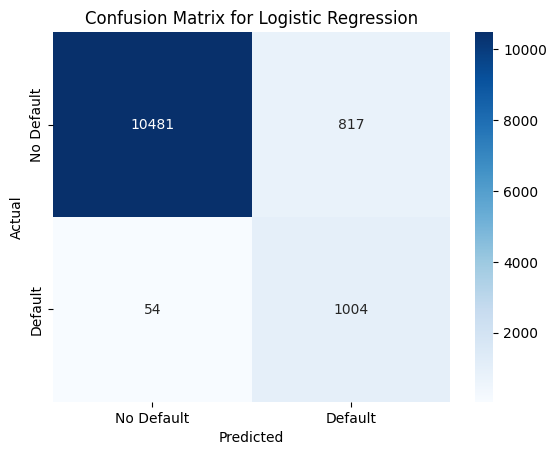


Evaluating Random Forest on test data...

Accuracy for Random Forest: 0.9523
Classification Report for Random Forest:

              precision    recall  f1-score   support

       False       0.99      0.96      0.97     11298
        True       0.67      0.87      0.76      1058

    accuracy                           0.95     12356
   macro avg       0.83      0.91      0.87     12356
weighted avg       0.96      0.95      0.96     12356



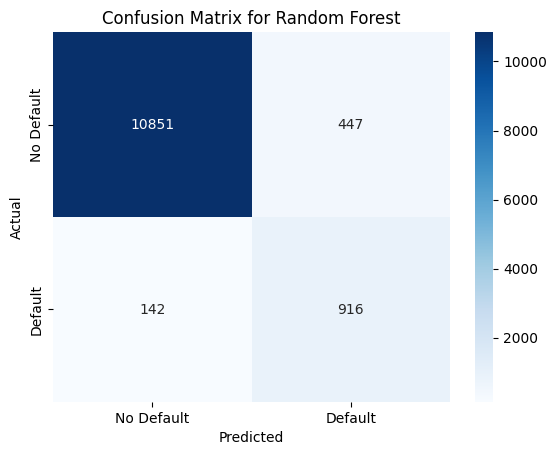


Evaluating XGBoost on test data...

Accuracy for XGBoost: 0.9578
Classification Report for XGBoost:

              precision    recall  f1-score   support

       False       0.98      0.97      0.98     11298
        True       0.72      0.83      0.77      1058

    accuracy                           0.96     12356
   macro avg       0.85      0.90      0.87     12356
weighted avg       0.96      0.96      0.96     12356



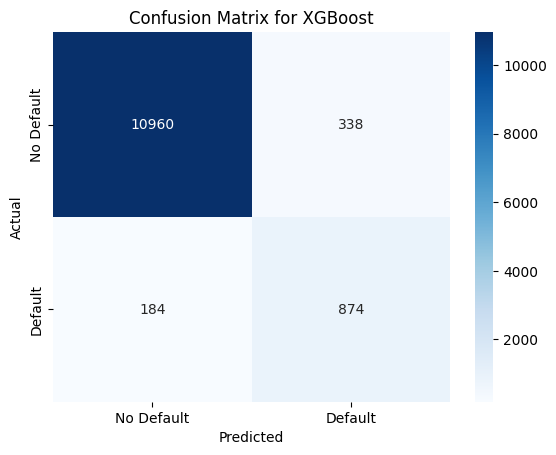

In [ ]:
saved_models_over = ['Logistic Regression_best_model_over.pkl', 'Random Forest_best_model_over.pkl', 'XGBoost_best_model_over.pkl']

for model_file in saved_models_over:
    # Extract the model name from the file name
    model_name = model_file.split('_best_model_over.pkl')[0]
    print(f"\nEvaluating {model_name} on test data...\n")

    # Load the saved model
    best_model = joblib.load(model_file)

    # Predict on the test data
    y_pred = best_model.predict(X_test_encoded)

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.4f}")

    # Classification Report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=["No Default", "Default"],
                yticklabels=["No Default", "Default"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

### **Optuna on Oversampled Data**

In [ ]:
def objective_logreg_over(trial):
    # Define hyperparameter search space
    C = trial.suggest_loguniform("C", 1e-3, 1e3)
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"]) if solver != "saga" else "l2"

    # Create Logistic Regression model
    model = LogisticRegression(C=C, solver=solver, penalty=penalty, random_state=42, max_iter=1000)

    # Cross-validation score
    score = cross_val_score(model, X_train_balanced_over, y_train_balanced_over, cv=5, scoring='accuracy').mean()
    return score

In [ ]:
study_logreg_over = optuna.create_study(direction="maximize")
study_logreg_over.optimize(objective_logreg_over, n_trials=50)

print("Best hyperparameters for Logistic Regression:", study_logreg_over.best_params)
print("Best accuracy for Logistic Regression:", study_logreg_over.best_value)

[I 2024-12-08 02:52:50,413] A new study created in memory with name: no-name-862712ab-d135-451a-a6ca-af59490f346f
[I 2024-12-08 02:52:58,105] Trial 0 finished with value: 0.9443838263276441 and parameters: {'C': 3.116963133608069, 'solver': 'liblinear', 'penalty': 'l1'}. Best is trial 0 with value: 0.9443838263276441.
[I 2024-12-08 02:53:03,032] Trial 1 finished with value: 0.9443395328092622 and parameters: {'C': 2.700039665258308, 'solver': 'saga'}. Best is trial 0 with value: 0.9443838263276441.
[I 2024-12-08 02:53:05,798] Trial 2 finished with value: 0.9395411773051743 and parameters: {'C': 0.004260382001930722, 'solver': 'saga'}. Best is trial 0 with value: 0.9443838263276441.
[I 2024-12-08 02:53:09,275] Trial 3 finished with value: 0.9443395338991349 and parameters: {'C': 22.575208124281037, 'solver': 'saga'}. Best is trial 0 with value: 0.9443838263276441.
[I 2024-12-08 02:53:13,174] Trial 4 finished with value: 0.9442066566136079 and parameters: {'C': 0.350033255991419, 'solver

Best hyperparameters for Logistic Regression: {'C': 0.051891716771743784, 'solver': 'liblinear', 'penalty': 'l1'}
Best accuracy for Logistic Regression: 0.9443985744856802


In [ ]:
def objective_rf_over(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 5, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    score = cross_val_score(model, X_train_balanced_over, y_train_balanced_over, cv=5, scoring='accuracy').mean()
    return score

In [ ]:
study_rf_over = optuna.create_study(direction="maximize")
study_rf_over.optimize(objective_rf_over, n_trials=30)

print("Best hyperparameters for Random Forest:", study_rf_over.best_params)
print("Best accuracy for Random Forest:", study_rf_over.best_value)

[I 2024-12-08 02:58:31,011] A new study created in memory with name: no-name-05b771af-4edc-47c0-a48f-66c3153965e0
[I 2024-12-08 03:00:50,218] Trial 0 finished with value: 0.9726127282903316 and parameters: {'n_estimators': 171, 'max_depth': 16, 'min_samples_split': 12, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9726127282903316.
[I 2024-12-08 03:05:31,982] Trial 1 finished with value: 0.9676077089358808 and parameters: {'n_estimators': 388, 'max_depth': 13, 'min_samples_split': 19, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9726127282903316.
[I 2024-12-08 03:06:46,049] Trial 2 finished with value: 0.9660427094319365 and parameters: {'n_estimators': 174, 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9726127282903316.
[I 2024-12-08 03:08:19,449] Trial 3 finished with value: 0.9399103520811029 and parameters: {'n_estimators': 266, 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 10}. Best is trial 0 with v

Best hyperparameters for Random Forest: {'n_estimators': 328, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best accuracy for Random Forest: 0.9779720641855271


In [ ]:
def objective_xgb_over(trial):
    eta = trial.suggest_loguniform("eta", 0.01, 0.5)  # Learning rate
    max_depth = trial.suggest_int("max_depth", 3, 10)
    subsample = trial.suggest_uniform("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_uniform("colsample_bytree", 0.5, 1.0)
    n_estimators = trial.suggest_int("n_estimators", 50, 700)

    model = XGBClassifier(
        eta=eta,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        n_estimators=n_estimators,
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    )

    score = cross_val_score(model, X_train_balanced_over, y_train_balanced_over, cv=5, scoring='accuracy').mean()
    return score

In [ ]:
study_xgb_over = optuna.create_study(direction="maximize")
study_xgb_over.optimize(objective_xgb_over, n_trials=40)

print("Best hyperparameters for XGBoost:", study_xgb_over.best_params)
print("Best accuracy for XGBoost:", study_xgb_over.best_value)

[I 2024-12-08 04:30:12,191] A new study created in memory with name: no-name-37a2d746-e5f4-4dd3-834a-e9d60dd14082
[I 2024-12-08 04:30:23,527] Trial 0 finished with value: 0.9588969195193604 and parameters: {'eta': 0.023571769879911168, 'max_depth': 4, 'subsample': 0.6750729716073668, 'colsample_bytree': 0.6693785991703757, 'n_estimators': 301}. Best is trial 0 with value: 0.9588969195193604.
[I 2024-12-08 04:30:34,542] Trial 1 finished with value: 0.9757871570506959 and parameters: {'eta': 0.10667578167677266, 'max_depth': 6, 'subsample': 0.6737718649222157, 'colsample_bytree': 0.7550382096432546, 'n_estimators': 214}. Best is trial 1 with value: 0.9757871570506959.
[I 2024-12-08 04:30:51,235] Trial 2 finished with value: 0.9728639297905719 and parameters: {'eta': 0.08739186843492933, 'max_depth': 3, 'subsample': 0.8005068892016824, 'colsample_bytree': 0.8481012260505241, 'n_estimators': 668}. Best is trial 1 with value: 0.9757871570506959.
[I 2024-12-08 04:31:18,394] Trial 3 finished 

Best hyperparameters for XGBoost: {'eta': 0.042224687108257504, 'max_depth': 10, 'subsample': 0.8408196945176803, 'colsample_bytree': 0.7975114263970655, 'n_estimators': 553}
Best accuracy for XGBoost: 0.9796700575913828


In [ ]:
# Logistic Regression
best_logreg_over = LogisticRegression(**study_logreg_over.best_params, random_state=42, max_iter=1000)
best_logreg_over.fit(X_train_balanced_over, y_train_balanced_over)
print(f"Training Score: {best_logreg_over.score(X_train_balanced_over, y_train_balanced_over)}")

Training Score: 0.9445461524833166


Accuracy on Test Data: 0.9280

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.93      0.96     11298
        True       0.55      0.95      0.69      1058

    accuracy                           0.93     12356
   macro avg       0.77      0.94      0.83     12356
weighted avg       0.96      0.93      0.94     12356



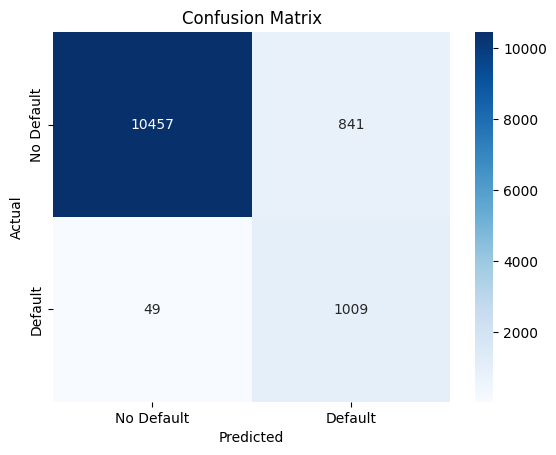

In [ ]:
y_pred = best_logreg_over.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Random Forest
best_rf_over = RandomForestClassifier(**study_rf_over.best_params, random_state=42)
best_rf_over.fit(X_train_balanced_over, y_train_balanced_over)
print(f"Training Score: {best_rf_over.score(X_train_balanced_over, y_train_balanced_over)}")

Training Score: 1.0


Accuracy on Test Data: 0.9494

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.96      0.97     11298
        True       0.65      0.87      0.75      1058

    accuracy                           0.95     12356
   macro avg       0.82      0.91      0.86     12356
weighted avg       0.96      0.95      0.95     12356



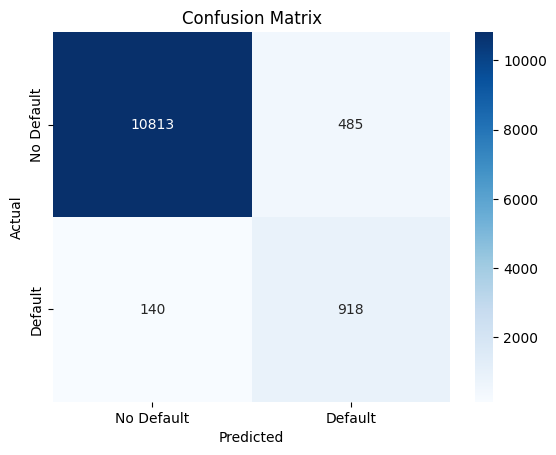

In [ ]:
y_pred = best_rf_over.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# XGBoost
best_xgb_over = XGBClassifier(**study_xgb_over.best_params, random_state=42)
best_xgb_over.fit(X_train_balanced_over, y_train_balanced_over)
print(f"Training Score: {best_xgb_over.score(X_train_balanced_over, y_train_balanced_over)}")

Training Score: 0.9999852359298411


Accuracy on Test Data: 0.9578

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.97      0.98     11298
        True       0.72      0.84      0.77      1058

    accuracy                           0.96     12356
   macro avg       0.85      0.91      0.88     12356
weighted avg       0.96      0.96      0.96     12356



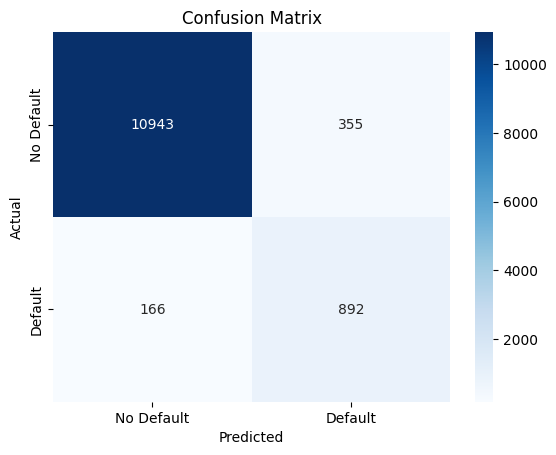

In [ ]:
y_pred = best_xgb_over.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
joblib.dump(best_logreg_over, "logreg_optuna_over.pkl")
print("Model saved successfully.")

Model saved successfully.


# **Best Performing Models Comparison**

**Ensuring the models have 90%+ recall score and 50%+ precision score on default class**

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
model_files = [
    "Logistic Regression_best_model_over.pkl",
    "Logistic Regression_best_model_under.pkl",
    "XGBoost_best_model_under.pkl",
    "logreg_optuna_over.pkl",
    "logreg_optuna_under.pkl",
    "lr_model_over.pkl",
    "lr_model_under.pkl",
    "xgb_model_under.pkl",
    "xgb_optuna_under.pkl"
]

In [ ]:
results = []

for model_file in model_files:
    model = joblib.load(model_file)

    y_pred = model.predict(X_test_encoded)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)

    results.append({
        "Model": model_file,
        "Accuracy": accuracy,
        "Precision (Default)": precision,
        "Recall (Default)": recall
    })

results_df = pd.DataFrame(results)
results_df

Model  Accuracy  Precision (Default)  \
0   Logistic Regression_best_model_over.pkl  0.929508             0.551345   
1  Logistic Regression_best_model_under.pkl  0.922224             0.525013   
2              XGBoost_best_model_under.pkl  0.928375             0.546035   
3                    logreg_optuna_over.pkl  0.927970             0.545405   
4                   logreg_optuna_under.pkl  0.921172             0.521516   
5                         lr_model_over.pkl  0.929022             0.549535   
6                        lr_model_under.pkl  0.920605             0.519653   
7                       xgb_model_under.pkl  0.926999             0.541756   
8                      xgb_optuna_under.pkl  0.924571             0.532541   

   Recall (Default)  
0          0.948960  
1          0.962193  
2          0.969754  
3          0.953686  
4          0.962193  
5          0.948960  
6          0.962193  
7          0.956522  
8          0.974480

In [ ]:
results_df[(results_df['Precision (Default)'] == results_df['Precision (Default)'].max()) | (results_df['Recall (Default)'] == results_df['Recall (Default)'].max())]

Model  Accuracy  Precision (Default)  \
0  Logistic Regression_best_model_over.pkl  0.929508             0.551345   
8                     xgb_optuna_under.pkl  0.924571             0.532541   

   Recall (Default)  
0           0.94896  
8           0.97448

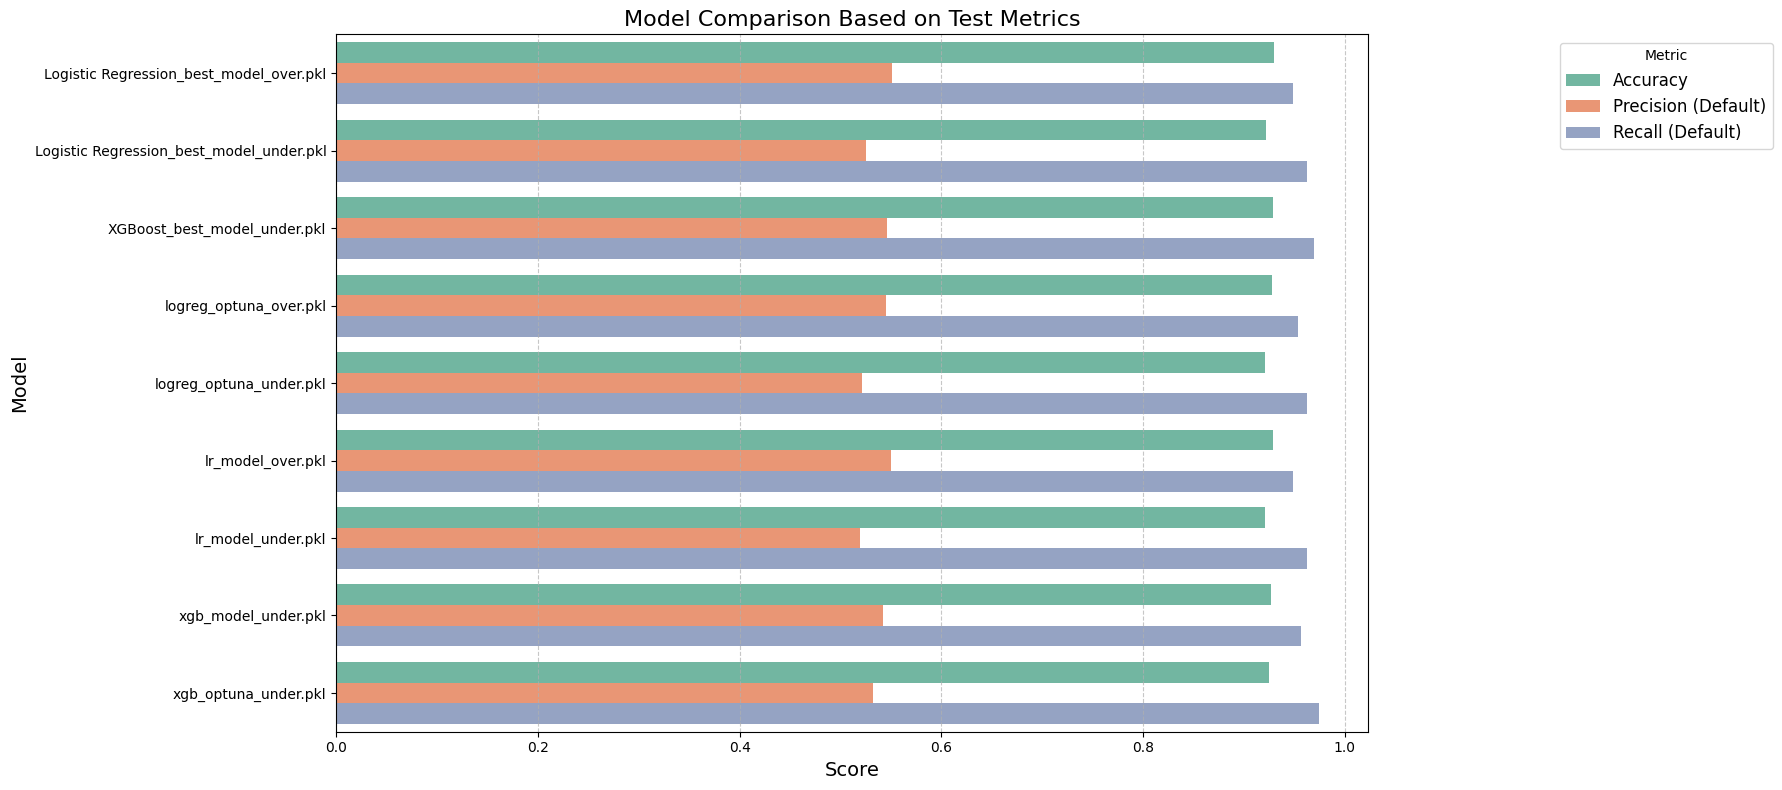

In [ ]:
plt.figure(figsize=(20, 8))

results_melted = results_df.melt(id_vars="Model",
                                 value_vars=["Accuracy", "Precision (Default)", "Recall (Default)"],
                                 var_name="Metric", value_name="Score")

sns.barplot(x="Score", y="Model", hue="Metric", data=results_melted, palette="Set2")

plt.title("Model Comparison Based on Test Metrics", fontsize=16)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.legend(title="Metric", loc="upper right", fontsize=12, bbox_to_anchor=(1.4, 1))
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

In [ ]:
loaded_models = {model_file: joblib.load(model_file) for model_file in model_files}

In [ ]:
loaded_models.items()

dict_items([('Logistic Regression_best_model_over.pkl', LogisticRegression(C=11.288378916846883, max_iter=200)), ('Logistic Regression_best_model_under.pkl', LogisticRegression(C=29.763514416313132, max_iter=200, solver='saga')), ('XGBoost_best_model_under.pkl', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=2,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=No

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Create a function for model evaluation
def evaluate_model(model, model_name, X_test, y_test):
    """
    Evaluate a single model: Compute probabilities, sort data, calculate metrics, plot ROC, and compute Gini and KS.
    """
    # Obtain predicted probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Create a DataFrame with actual labels and predicted probabilities
    df = pd.DataFrame({"default_truth": y_test, "default_probability": y_prob})

    # Sort by predicted probabilities
    df = df.sort_values(by="default_probability", ascending=False).reset_index(drop=True)

    # Divide into deciles
    df["decile"] = pd.qcut(df["default_probability"], 10, labels=range(1, 11))

    # Calculate min and max probabilities per decile
    decile_stats = df.groupby("decile").agg(
        min_probability=("default_probability", "min"),
        max_probability=("default_probability", "max"),
        event_count=("default_truth", "sum"),
        non_event_count=("default_truth", lambda x: (x == 0).sum())
    )
    decile_stats["event_rate"] = decile_stats["event_count"] / decile_stats["event_count"].sum()
    decile_stats["non_event_rate"] = decile_stats["non_event_count"] / decile_stats["non_event_count"].sum()

    # Compute cumulative metrics
    decile_stats["cum_event_rate"] = decile_stats["event_rate"].cumsum()
    decile_stats["cum_non_event_rate"] = decile_stats["non_event_rate"].cumsum()

    # Calculate KS Statistic
    decile_stats["ks"] = abs(decile_stats["cum_event_rate"] - decile_stats["cum_non_event_rate"]) * 100
    ks_stat = decile_stats["ks"].max()

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    # Gini Coefficient
    gini_coefficient = 2 * auc_score - 1

    # Plotting and Results
    print(f"\n=== Model: {model_name} ===")
    print(f"KS Statistic: {ks_stat:.2f}")
    print(f"AUC: {auc_score:.4f}")
    print(f"Gini Coefficient: {gini_coefficient:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, model.predict(X_test))}")

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color="blue")
    plt.plot([0, 1], [0, 1], "k--", label="Random Model")
    plt.title(f"ROC Curve for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    return decile_stats

Evaluating model: Logistic Regression Best Model Over

=== Model: Logistic Regression Best Model Over ===
KS Statistic: 86.25
AUC: 0.9833
Gini Coefficient: 0.9665
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.93      0.96     11298
        True       0.55      0.95      0.70      1058

    accuracy                           0.93     12356
   macro avg       0.77      0.94      0.83     12356
weighted avg       0.96      0.93      0.94     12356



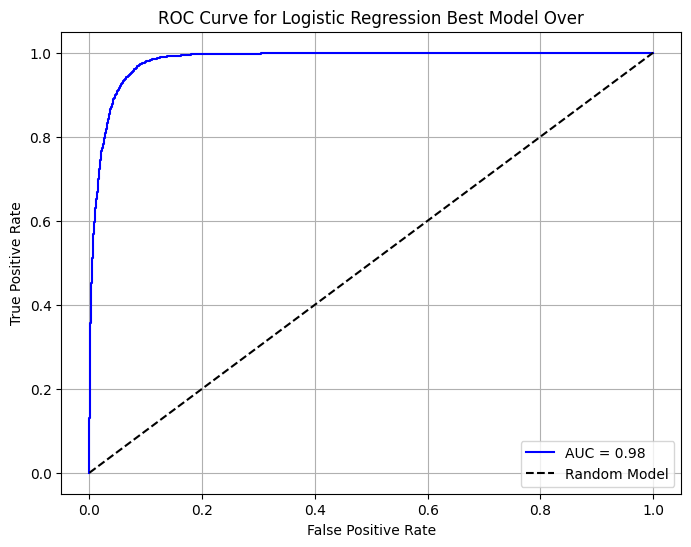

Evaluating model: Logistic Regression Best Model Under

=== Model: Logistic Regression Best Model Under ===
KS Statistic: 86.25
AUC: 0.9833
Gini Coefficient: 0.9666
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11298
        True       0.53      0.96      0.68      1058

    accuracy                           0.92     12356
   macro avg       0.76      0.94      0.82     12356
weighted avg       0.96      0.92      0.93     12356



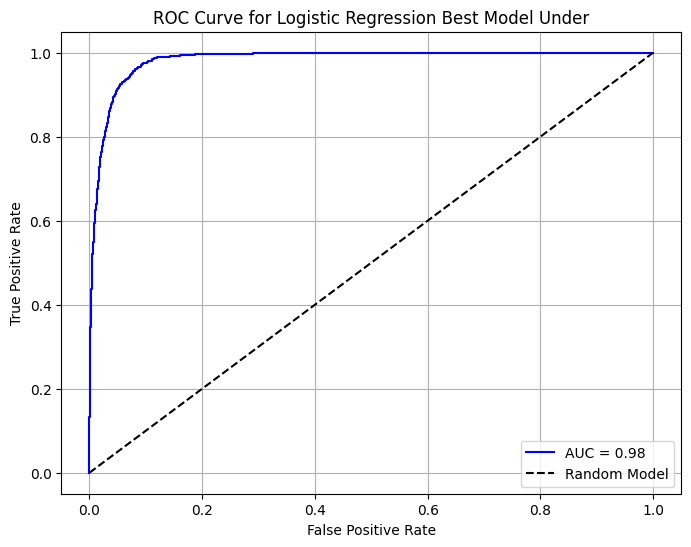

Evaluating model: Xgboost Best Model Under

=== Model: Xgboost Best Model Under ===
KS Statistic: 86.67
AUC: 0.9857
Gini Coefficient: 0.9715
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11298
        True       0.55      0.97      0.70      1058

    accuracy                           0.93     12356
   macro avg       0.77      0.95      0.83     12356
weighted avg       0.96      0.93      0.94     12356



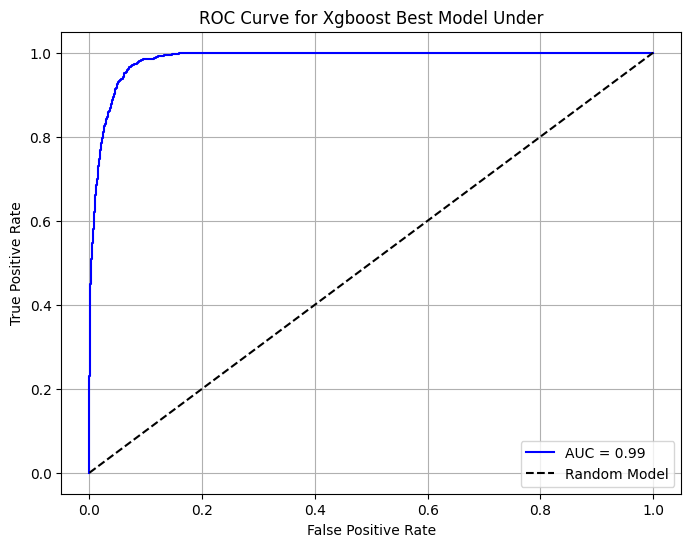

Evaluating model: Logreg Optuna Over

=== Model: Logreg Optuna Over ===
KS Statistic: 86.15
AUC: 0.9833
Gini Coefficient: 0.9665
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.93      0.96     11298
        True       0.55      0.95      0.69      1058

    accuracy                           0.93     12356
   macro avg       0.77      0.94      0.83     12356
weighted avg       0.96      0.93      0.94     12356



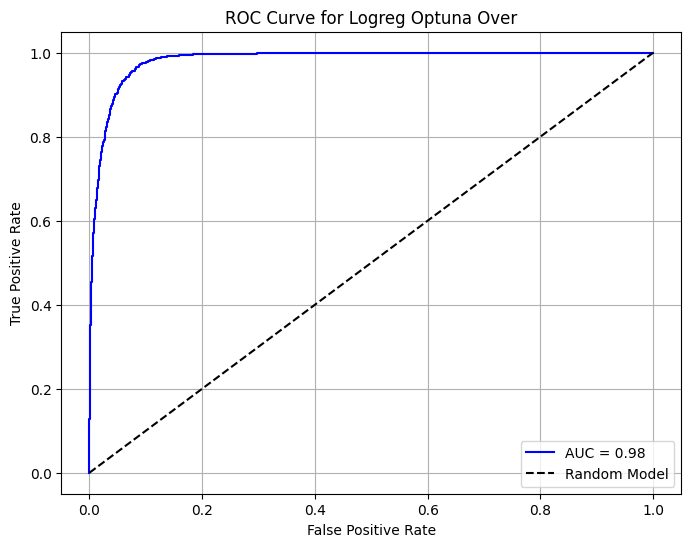

Evaluating model: Logreg Optuna Under

=== Model: Logreg Optuna Under ===
KS Statistic: 86.25
AUC: 0.9833
Gini Coefficient: 0.9666
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11298
        True       0.52      0.96      0.68      1058

    accuracy                           0.92     12356
   macro avg       0.76      0.94      0.82     12356
weighted avg       0.96      0.92      0.93     12356



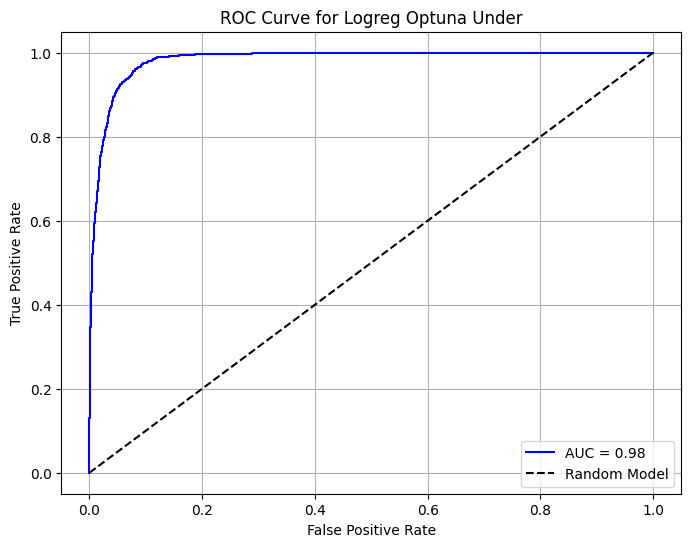

Evaluating model: Lr Model Over

=== Model: Lr Model Over ===
KS Statistic: 86.25
AUC: 0.9833
Gini Coefficient: 0.9665
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.93      0.96     11298
        True       0.55      0.95      0.70      1058

    accuracy                           0.93     12356
   macro avg       0.77      0.94      0.83     12356
weighted avg       0.96      0.93      0.94     12356



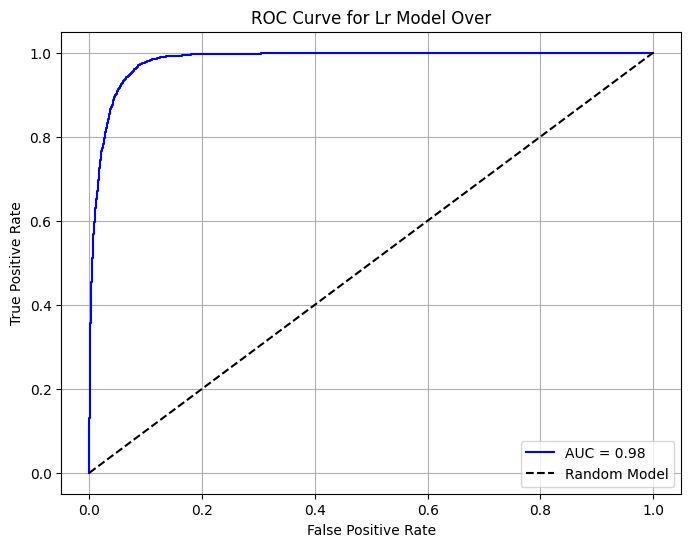

Evaluating model: Lr Model Under

=== Model: Lr Model Under ===
KS Statistic: 86.25
AUC: 0.9832
Gini Coefficient: 0.9664
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.95     11298
        True       0.52      0.96      0.67      1058

    accuracy                           0.92     12356
   macro avg       0.76      0.94      0.81     12356
weighted avg       0.96      0.92      0.93     12356



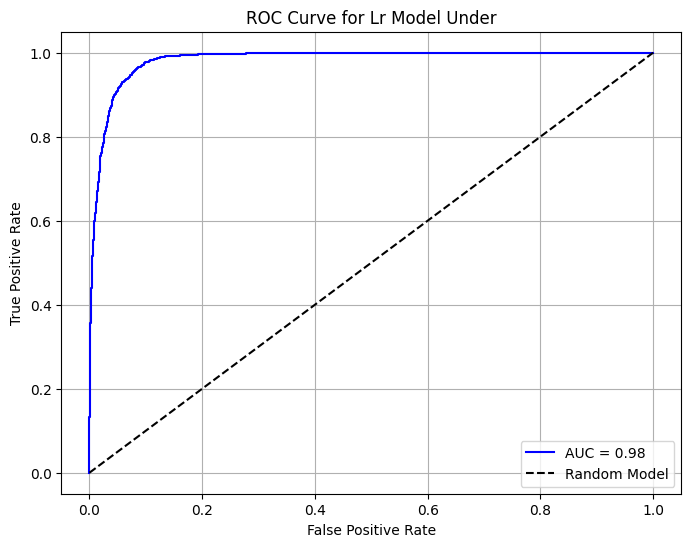

Evaluating model: Xgb Model Under

=== Model: Xgb Model Under ===
KS Statistic: 86.25
AUC: 0.9824
Gini Coefficient: 0.9648
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11298
        True       0.54      0.96      0.69      1058

    accuracy                           0.93     12356
   macro avg       0.77      0.94      0.83     12356
weighted avg       0.96      0.93      0.94     12356



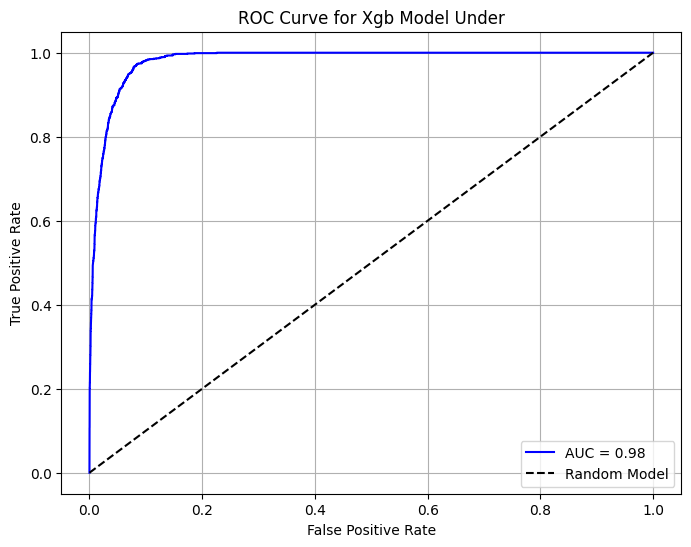

Evaluating model: Xgb Optuna Under

=== Model: Xgb Optuna Under ===
KS Statistic: 86.87
AUC: 0.9863
Gini Coefficient: 0.9726
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11298
        True       0.53      0.97      0.69      1058

    accuracy                           0.92     12356
   macro avg       0.76      0.95      0.82     12356
weighted avg       0.96      0.92      0.93     12356



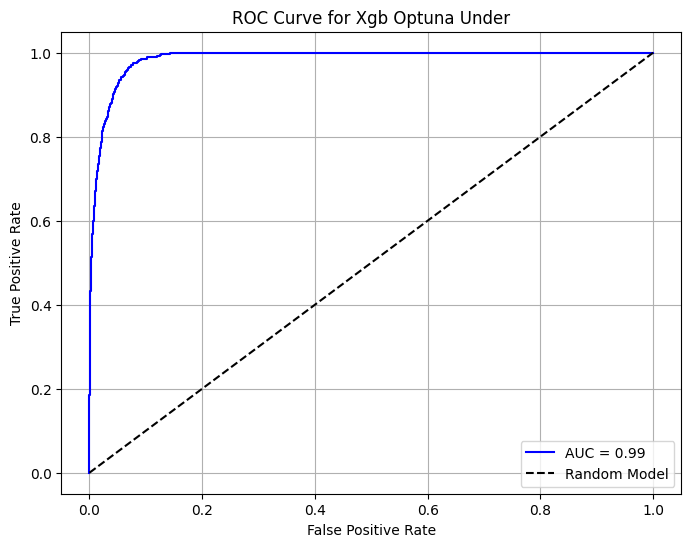

In [ ]:
# Iterate through all loaded models
all_results = {}

for model_file, model in loaded_models.items():
    model_name = model_file.replace(".pkl", "").replace("_", " ").title()
    print(f"Evaluating model: {model_name}")

    # Call the evaluation function
    all_results[model_name] = evaluate_model(model, model_name, X_test_encoded, y_test)

In [ ]:
all_results['Logistic Regression Best Model Over']

min_probability  max_probability  event_count  non_event_count  \
decile                                                                   
1          9.994309e-10     8.703710e-07            0             1236   
2          8.737871e-07     6.246238e-06            0             1236   
3          6.256332e-06     3.470175e-05            0             1235   
4          3.478163e-05     1.702971e-04            0             1236   
5          1.705042e-04     9.134788e-04            0             1235   
6          9.136111e-04     5.336599e-03            0             1236   
7          5.339145e-03     3.264715e-02            2             1233   
8          3.266233e-02     2.206731e-01           10             1226   
9          2.211851e-01     8.255349e-01          169             1066   
10         8.265941e-01     1.000000e+00          877              359   

        event_rate  non_event_rate  cum_event_rate  cum_non_event_rate  \
decile                                                                   
1         0.000000        0.109400        0.000000            0.109400   
2         0.000000        0.109400        0.000000            0.218800   
3         0.000000        0.109311        0.000000            0.328111   
4         0.000000        0.109400        0.000000            0.437511   
5         0.000000        0.109311        0.000000            0.546822   
6         0.000000        0.109400        0.000000            0.656222   
7         0.001890        0.109134        0.001890            0.765357   
8         0.009452        0.108515        0.011342            0.873871   
9         0.159735        0.094353        0.171078            0.968224   
10        0.828922        0.031776        1.000000            1.000000   

               ks  
decile             
1       10.939989  
2       21.879979  
3       32.811117  
4       43.751106  
5       54.682245  
6       65.622234  
7       76.346634  
8       86.252933  
9       79.714696  
10       0.000000

In [ ]:
all_results.keys()

dict_keys(['Logistic Regression Best Model Over', 'Logistic Regression Best Model Under', 'Xgboost Best Model Under', 'Logreg Optuna Over', 'Logreg Optuna Under', 'Lr Model Over', 'Lr Model Under', 'Xgb Model Under', 'Xgb Optuna Under'])

In [ ]:
for model in all_results.keys():
    print(f"For {model}:\n")
    print(np.round(all_results[model], 2))
    print("\n" + "="*50 + "\n")

For Logistic Regression Best Model Over:

        min_probability  max_probability  event_count  non_event_count  \
decile                                                                   
1                  0.00             0.00            0             1236   
2                  0.00             0.00            0             1236   
3                  0.00             0.00            0             1235   
4                  0.00             0.00            0             1236   
5                  0.00             0.00            0             1235   
6                  0.00             0.01            0             1236   
7                  0.01             0.03            2             1233   
8                  0.03             0.22           10             1226   
9                  0.22             0.83          169             1066   
10                 0.83             1.00          877              359   

        event_rate  non_event_rate  cum_event_rate  cum_non_event_rat

In [ ]:
def plot_gains_and_lift(df, model_name):
    """
    Plot cumulative gains and lift charts.
    """
    # Calculate cumulative gains and lift metrics
    df = df.sort_values(by="default_probability", ascending=False).reset_index(drop=True)
    df["cum_event"] = df["default_truth"].cumsum()
    df["cum_non_event"] = (~df["default_truth"].astype(bool)).cumsum()
    df["cum_event_rate"] = df["cum_event"] / df["default_truth"].sum()
    df["population_rate"] = (df.index + 1) / len(df)
    df["lift"] = df["cum_event_rate"] / df["population_rate"]

    # Plot Cumulative Gains Chart
    plt.figure(figsize=(12, 6))
    plt.plot(df["population_rate"], df["cum_event_rate"], label="Model")
    plt.plot([0, 1], [0, 1], "k--", label="Random Model")
    plt.title(f"Cumulative Gains Chart for {model_name}")
    plt.xlabel("Population Proportion")
    plt.ylabel("Cumulative Event Proportion")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Lift Chart
    plt.figure(figsize=(12, 6))
    plt.plot(df["population_rate"], df["lift"], label="Model")
    plt.axhline(1, color="k", linestyle="--", label="Baseline")
    plt.title(f"Lift Chart for {model_name}")
    plt.xlabel("Population Proportion")
    plt.ylabel("Lift")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
# Updated evaluation function with gains and lift chart plots
def evaluate_model_with_charts(model, model_name, X_test, y_test):
    """
    Extended evaluation function to include cumulative gains and lift charts.
    """
    # Obtain predicted probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Create a DataFrame with actual labels and predicted probabilities
    df = pd.DataFrame({"default_truth": y_test, "default_probability": y_prob})

    # Sort by predicted probabilities
    df = df.sort_values(by="default_probability", ascending=False).reset_index(drop=True)

    # Evaluate using the existing method
    decile_stats = evaluate_model(model, model_name, X_test, y_test)

    # Plot cumulative gains and lift charts
    plot_gains_and_lift(df, model_name)

    return decile_stats

Evaluating model: Logistic Regression Best Model Over

=== Model: Logistic Regression Best Model Over ===
KS Statistic: 86.25
AUC: 0.9833
Gini Coefficient: 0.9665
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.93      0.96     11298
        True       0.55      0.95      0.70      1058

    accuracy                           0.93     12356
   macro avg       0.77      0.94      0.83     12356
weighted avg       0.96      0.93      0.94     12356



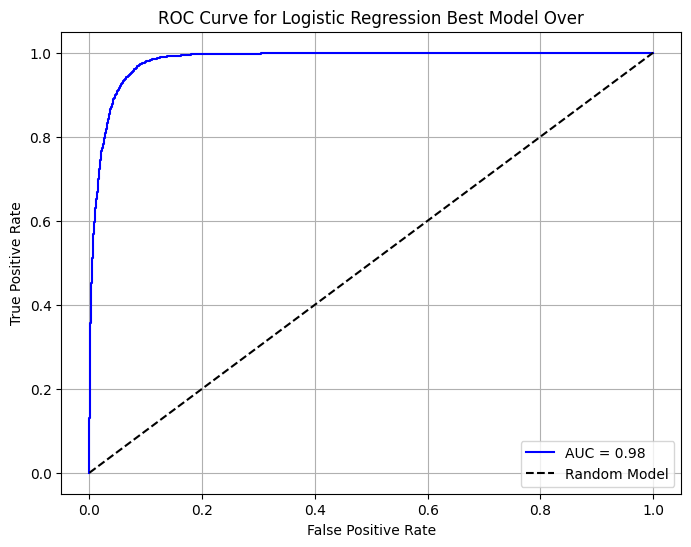

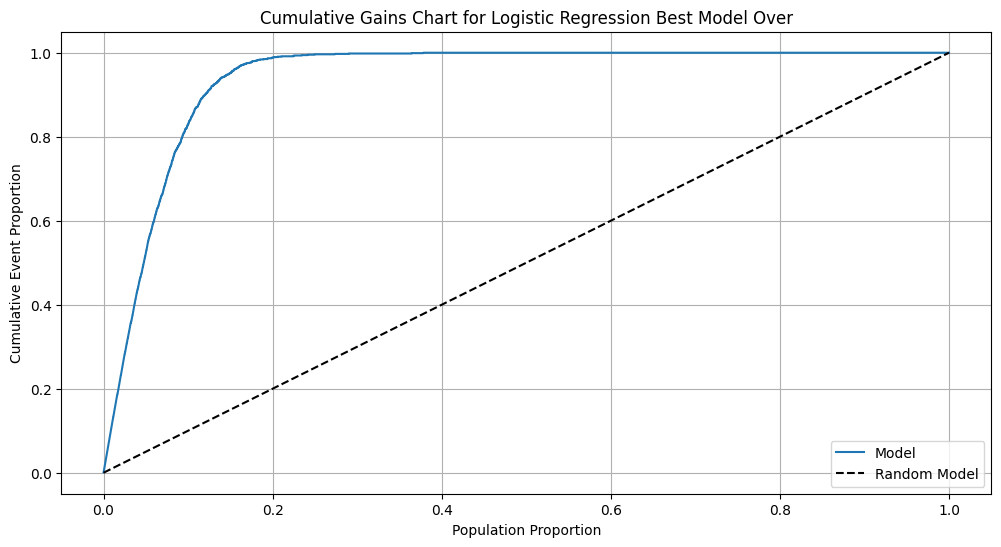

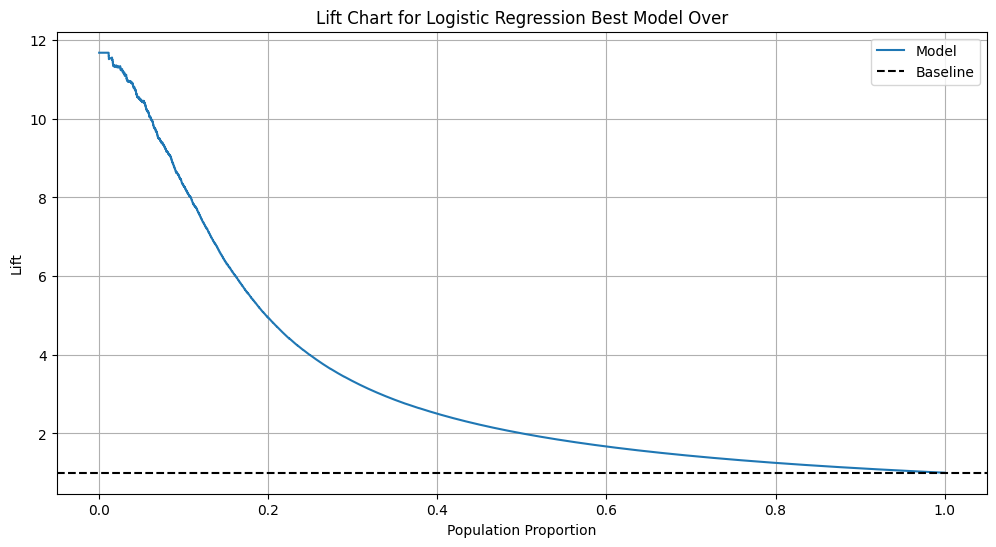

Evaluating model: Logistic Regression Best Model Under

=== Model: Logistic Regression Best Model Under ===
KS Statistic: 86.25
AUC: 0.9833
Gini Coefficient: 0.9666
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11298
        True       0.53      0.96      0.68      1058

    accuracy                           0.92     12356
   macro avg       0.76      0.94      0.82     12356
weighted avg       0.96      0.92      0.93     12356



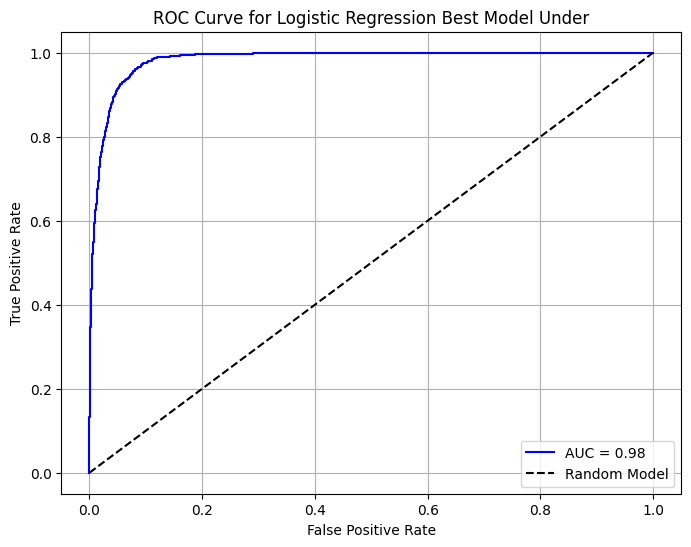

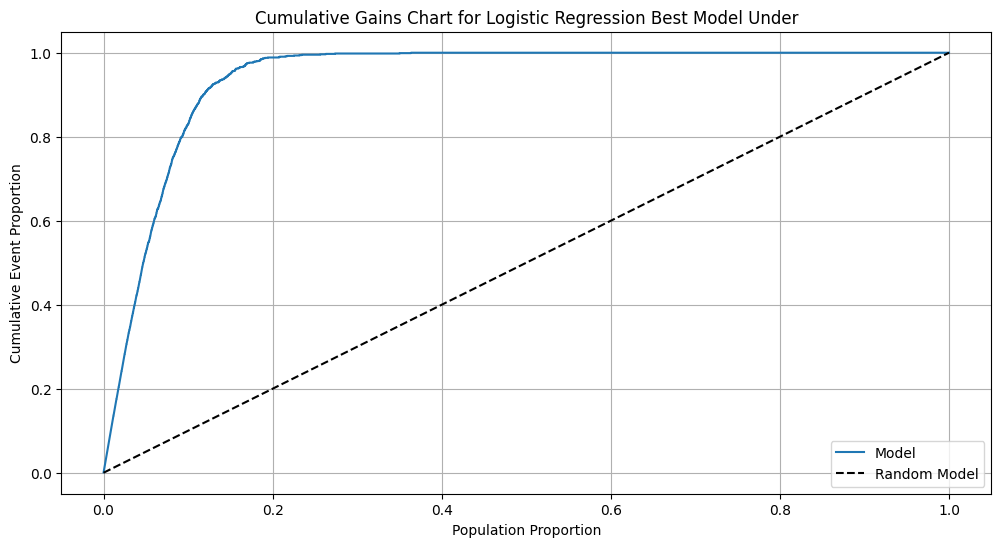

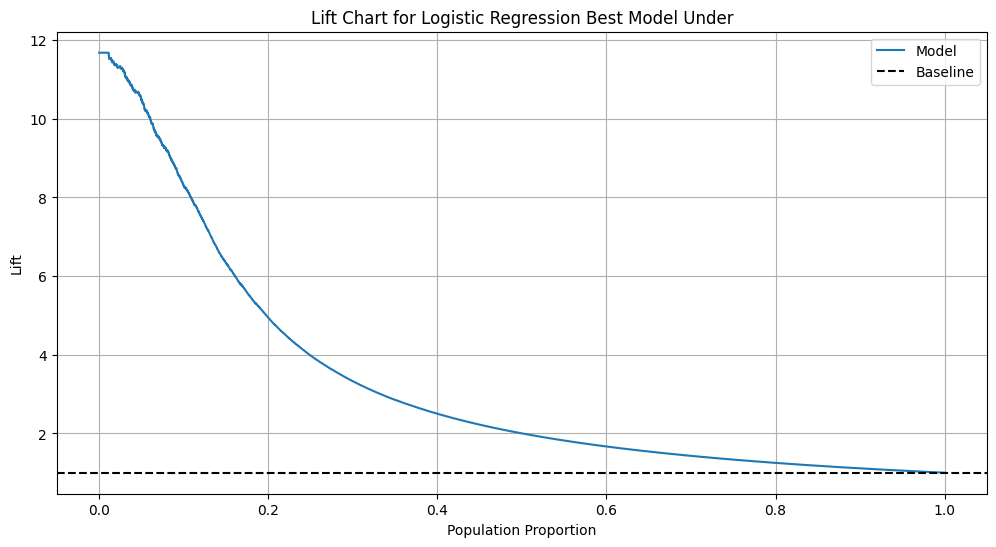

Evaluating model: Xgboost Best Model Under

=== Model: Xgboost Best Model Under ===
KS Statistic: 86.67
AUC: 0.9857
Gini Coefficient: 0.9715
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11298
        True       0.55      0.97      0.70      1058

    accuracy                           0.93     12356
   macro avg       0.77      0.95      0.83     12356
weighted avg       0.96      0.93      0.94     12356



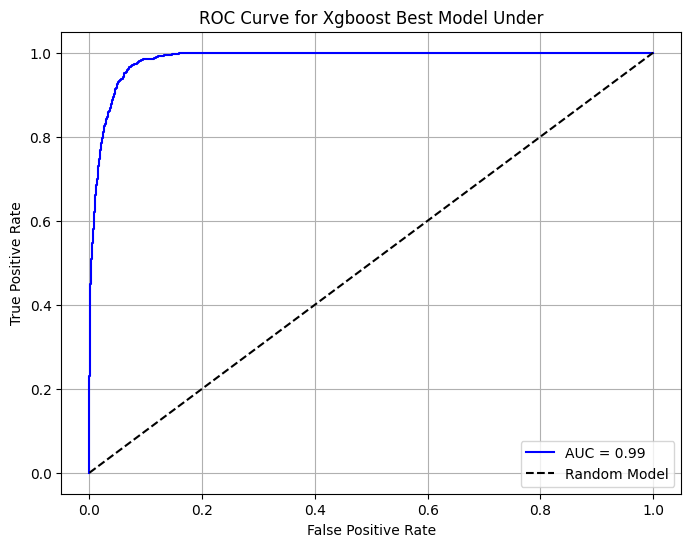

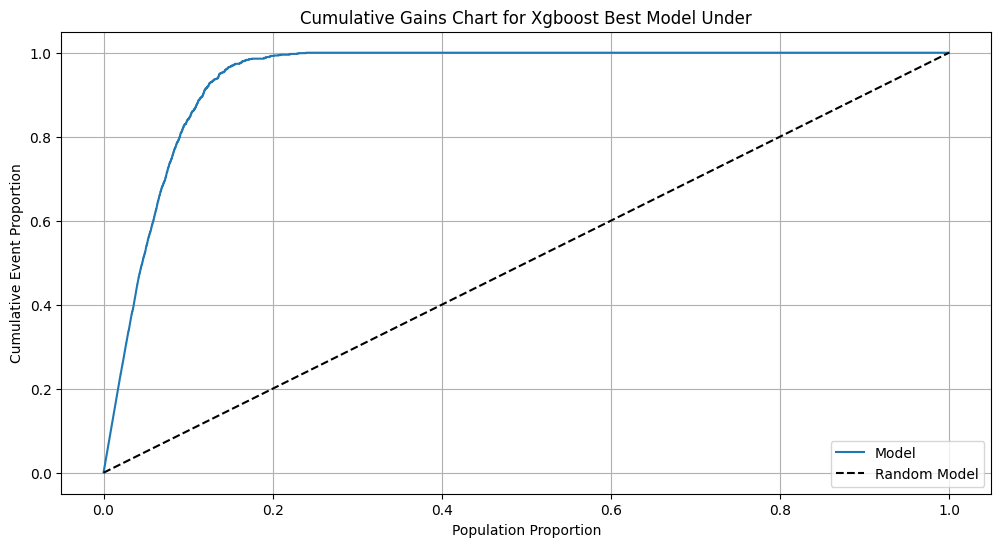

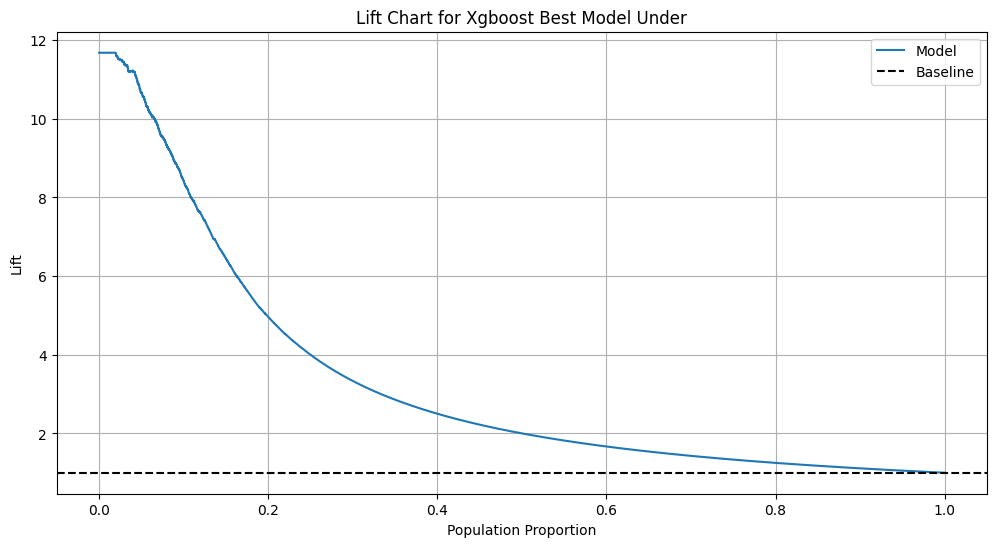

Evaluating model: Logreg Optuna Over

=== Model: Logreg Optuna Over ===
KS Statistic: 86.15
AUC: 0.9833
Gini Coefficient: 0.9665
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.93      0.96     11298
        True       0.55      0.95      0.69      1058

    accuracy                           0.93     12356
   macro avg       0.77      0.94      0.83     12356
weighted avg       0.96      0.93      0.94     12356



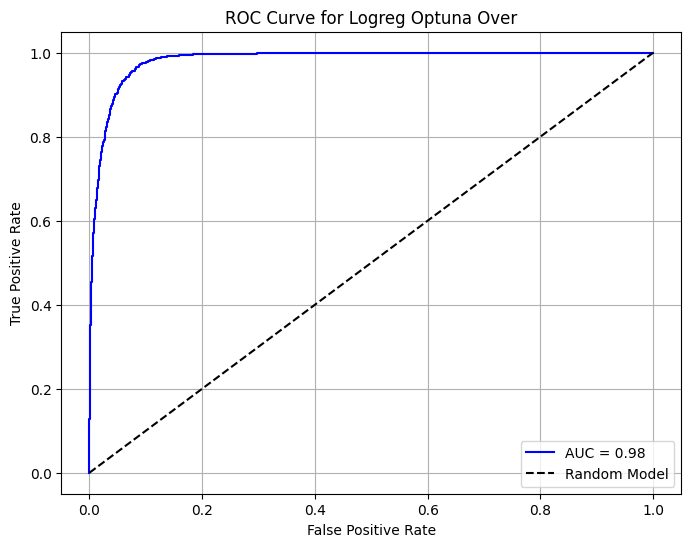

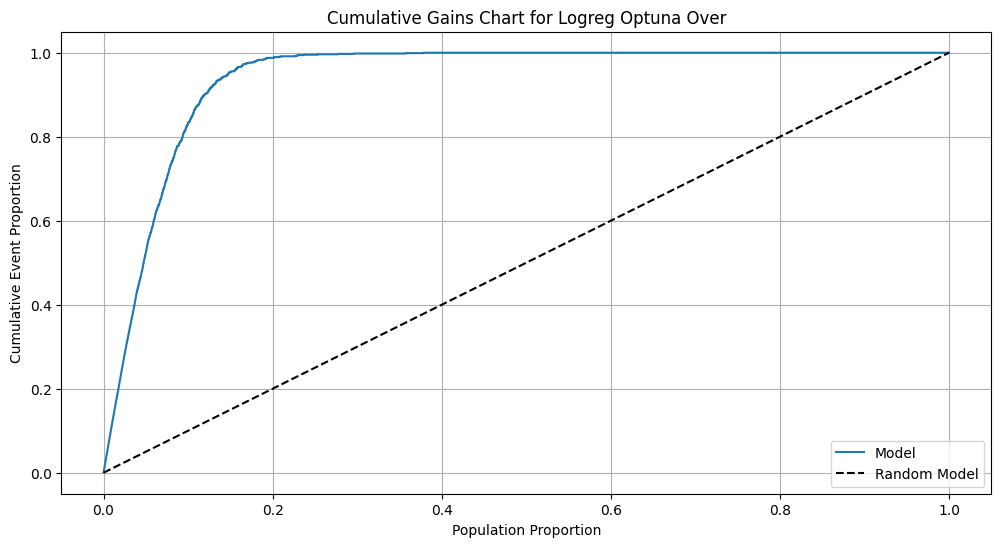

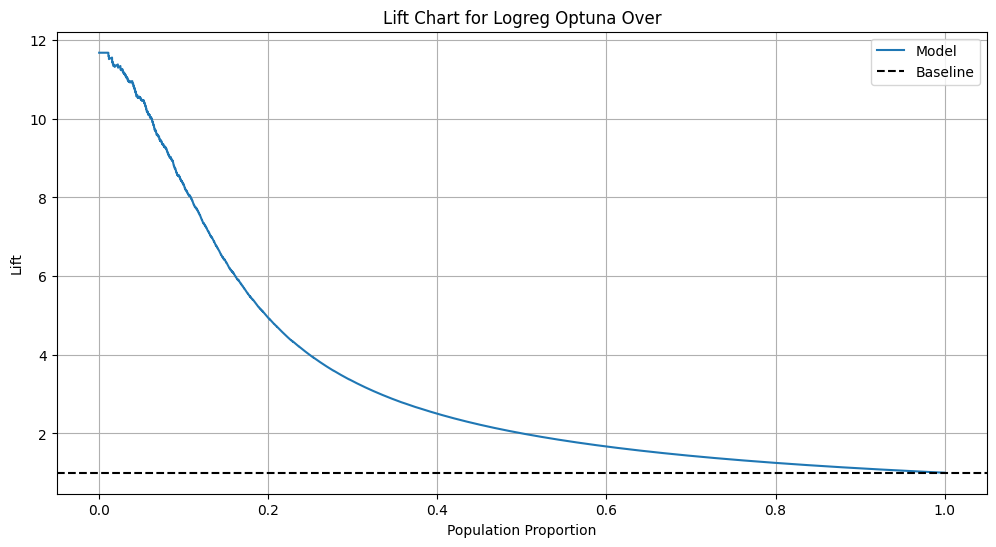

Evaluating model: Logreg Optuna Under

=== Model: Logreg Optuna Under ===
KS Statistic: 86.25
AUC: 0.9833
Gini Coefficient: 0.9666
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11298
        True       0.52      0.96      0.68      1058

    accuracy                           0.92     12356
   macro avg       0.76      0.94      0.82     12356
weighted avg       0.96      0.92      0.93     12356



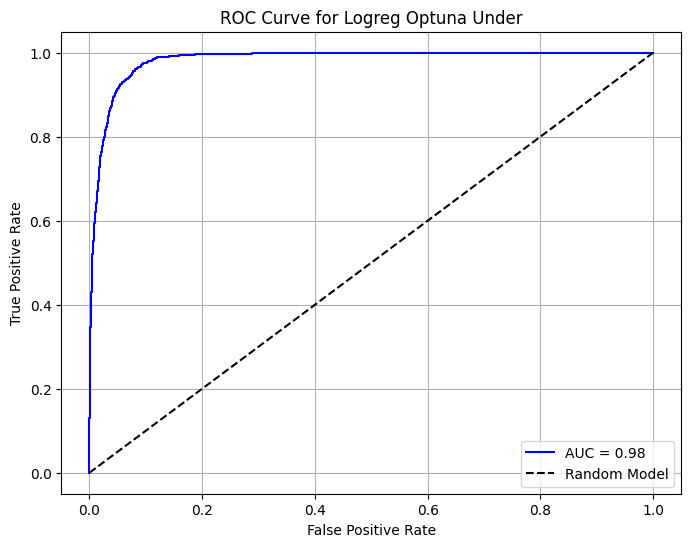

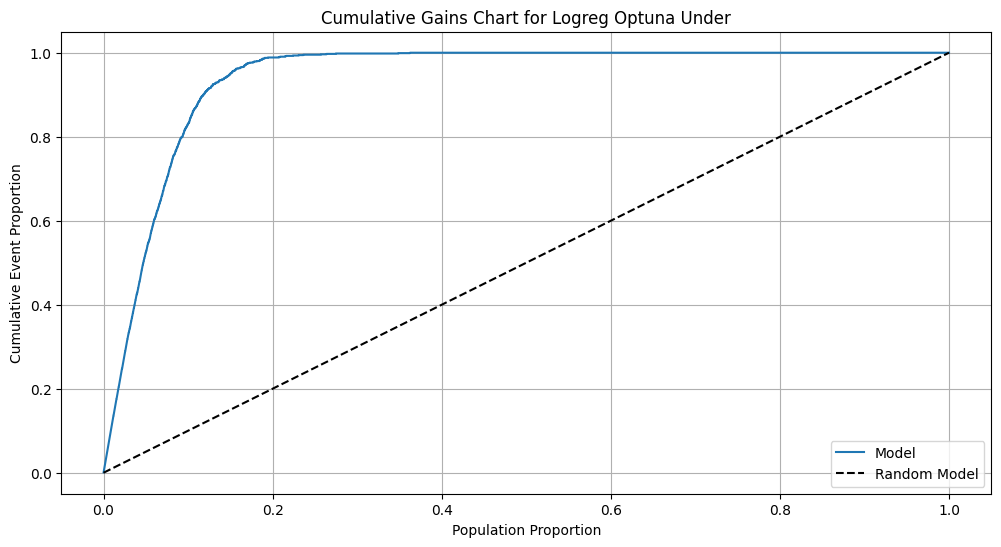

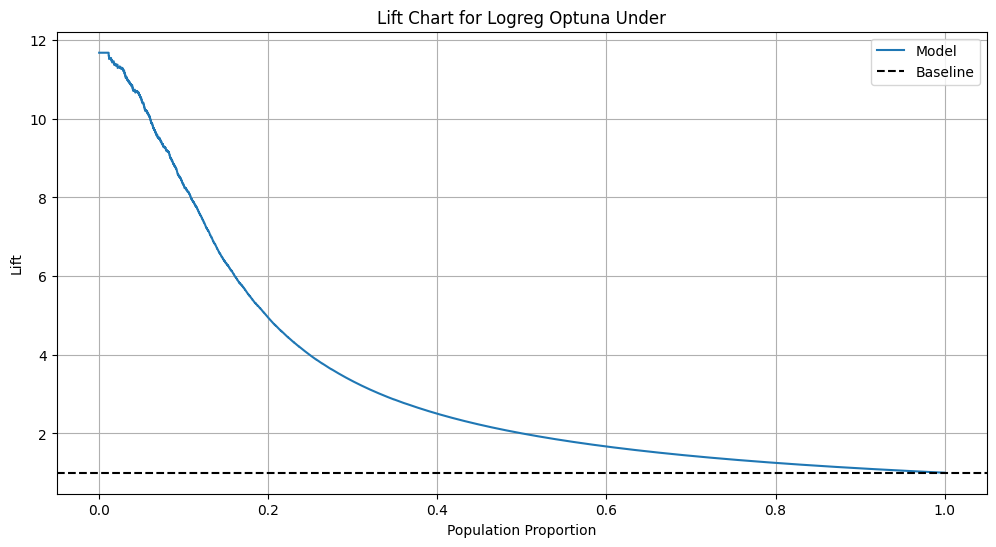

Evaluating model: Lr Model Over

=== Model: Lr Model Over ===
KS Statistic: 86.25
AUC: 0.9833
Gini Coefficient: 0.9665
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.93      0.96     11298
        True       0.55      0.95      0.70      1058

    accuracy                           0.93     12356
   macro avg       0.77      0.94      0.83     12356
weighted avg       0.96      0.93      0.94     12356



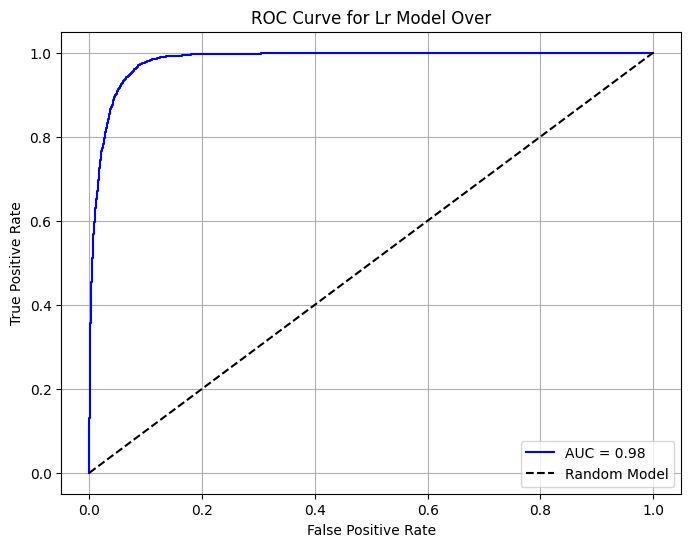

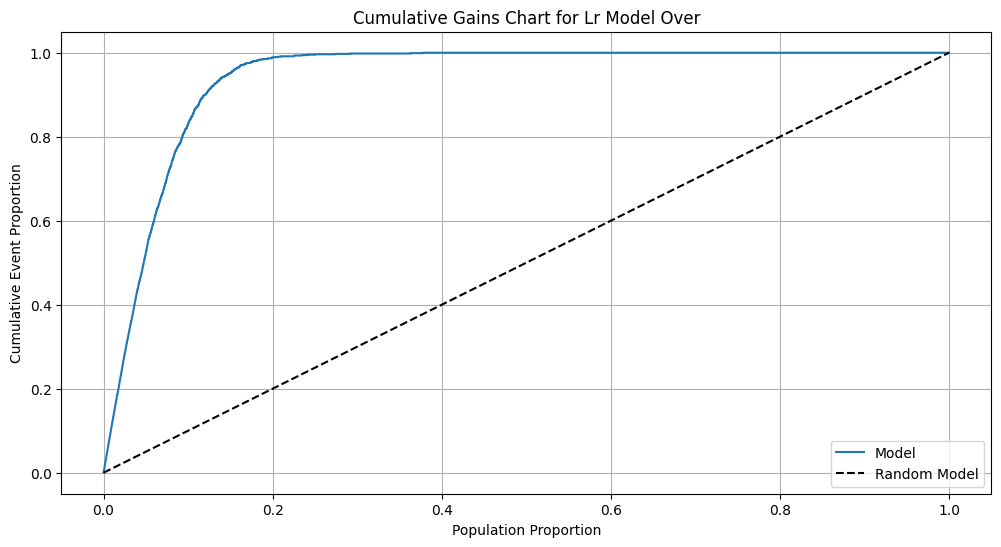

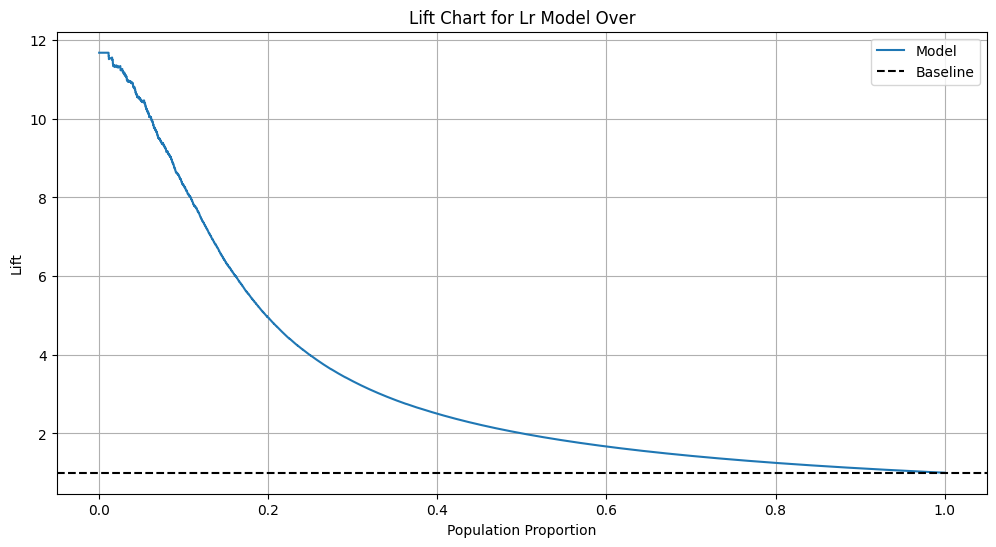

Evaluating model: Lr Model Under

=== Model: Lr Model Under ===
KS Statistic: 86.25
AUC: 0.9832
Gini Coefficient: 0.9664
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.95     11298
        True       0.52      0.96      0.67      1058

    accuracy                           0.92     12356
   macro avg       0.76      0.94      0.81     12356
weighted avg       0.96      0.92      0.93     12356



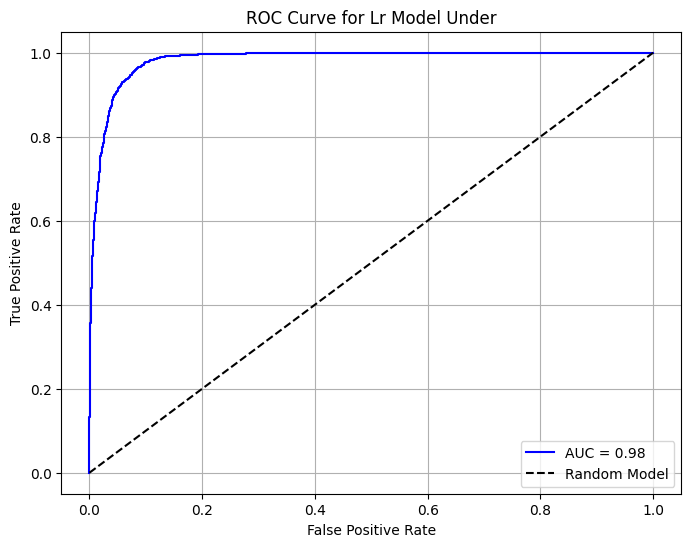

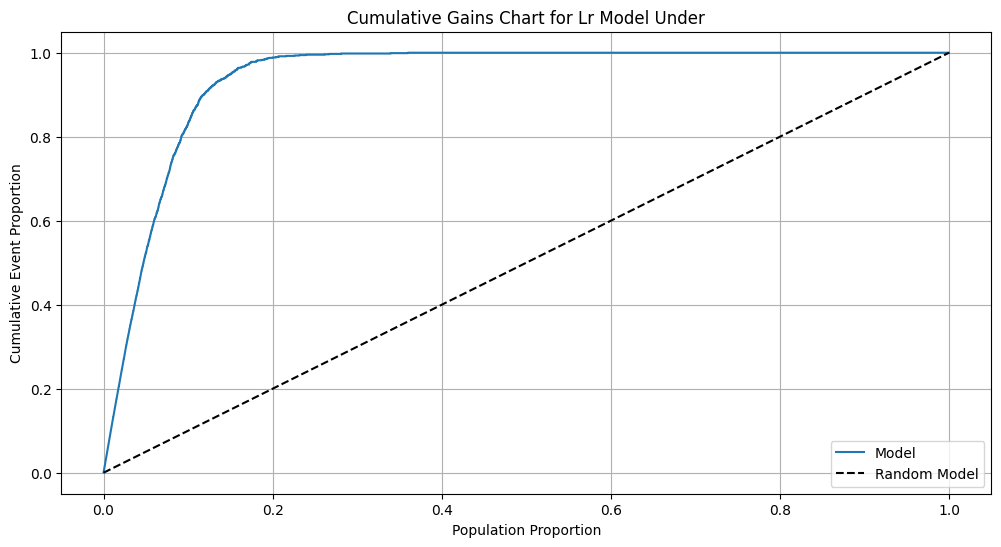

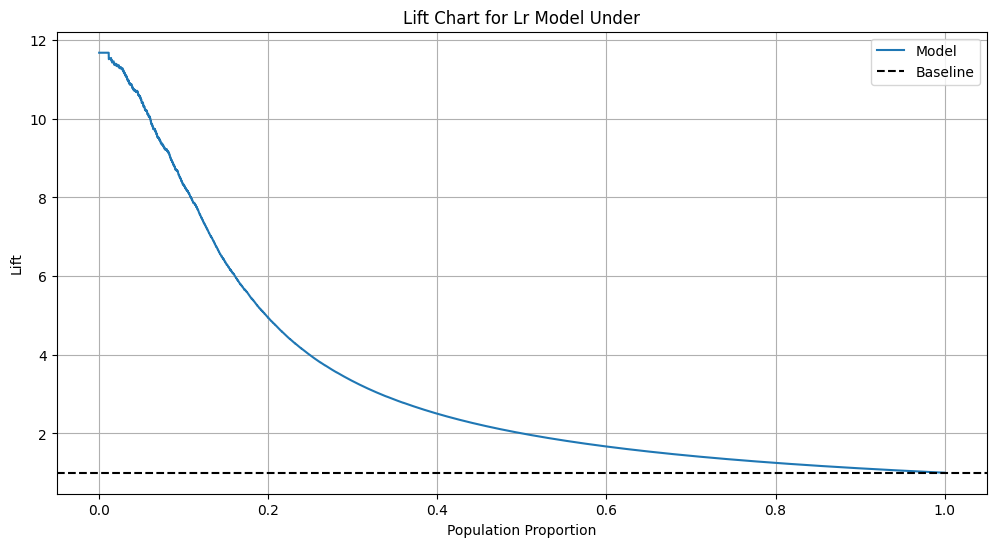

Evaluating model: Xgb Model Under

=== Model: Xgb Model Under ===
KS Statistic: 86.25
AUC: 0.9824
Gini Coefficient: 0.9648
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11298
        True       0.54      0.96      0.69      1058

    accuracy                           0.93     12356
   macro avg       0.77      0.94      0.83     12356
weighted avg       0.96      0.93      0.94     12356



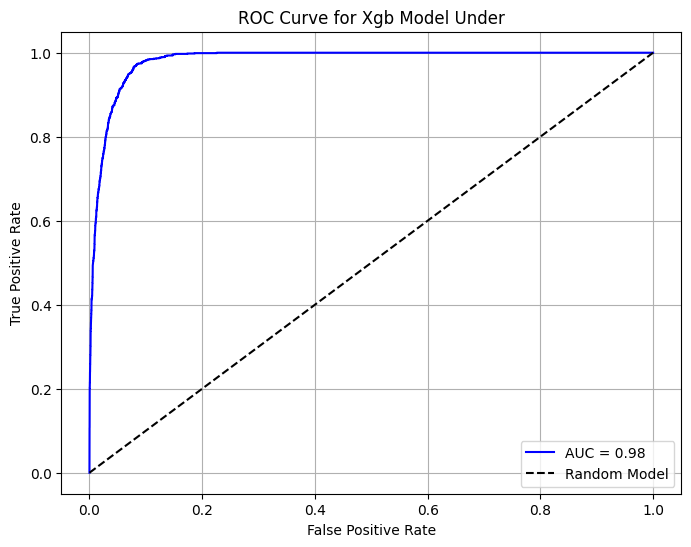

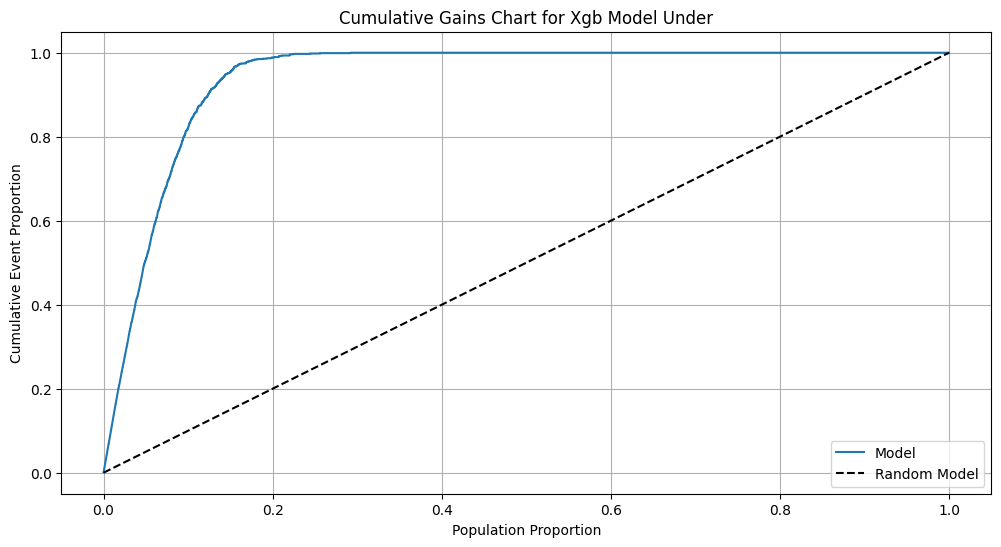

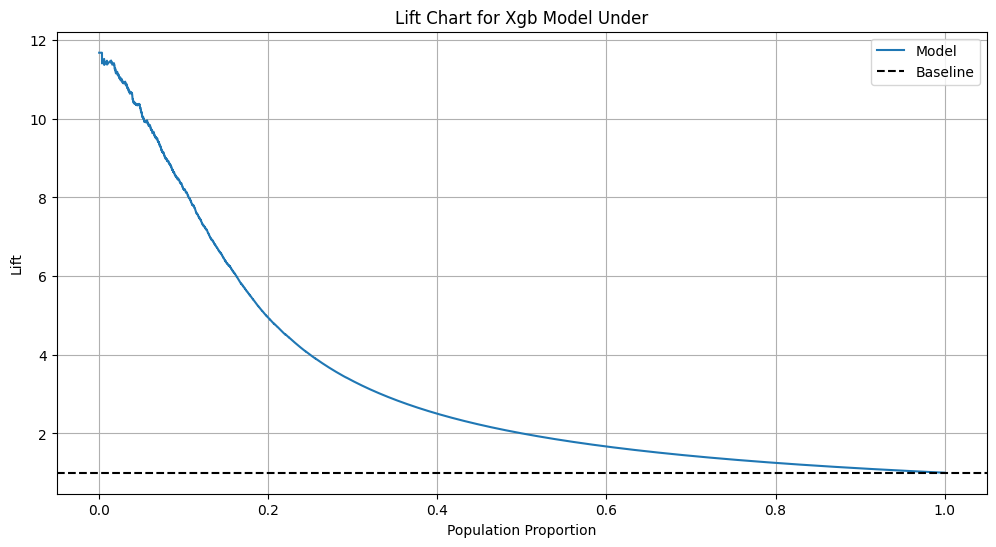

Evaluating model: Xgb Optuna Under

=== Model: Xgb Optuna Under ===
KS Statistic: 86.87
AUC: 0.9863
Gini Coefficient: 0.9726
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.92      0.96     11298
        True       0.53      0.97      0.69      1058

    accuracy                           0.92     12356
   macro avg       0.76      0.95      0.82     12356
weighted avg       0.96      0.92      0.93     12356



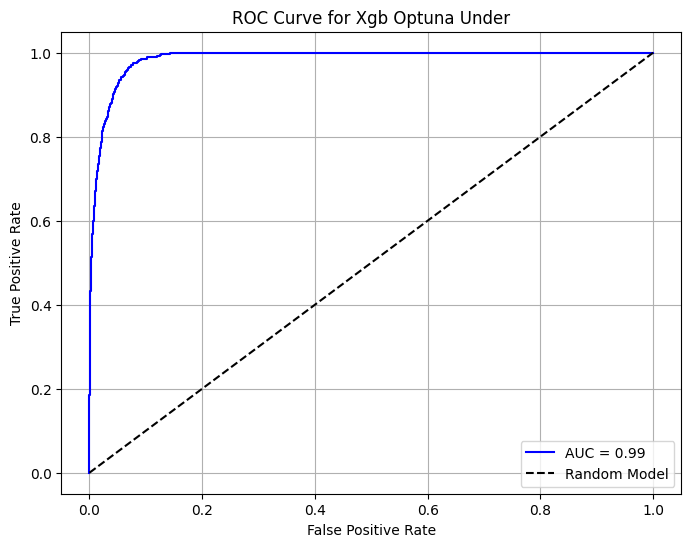

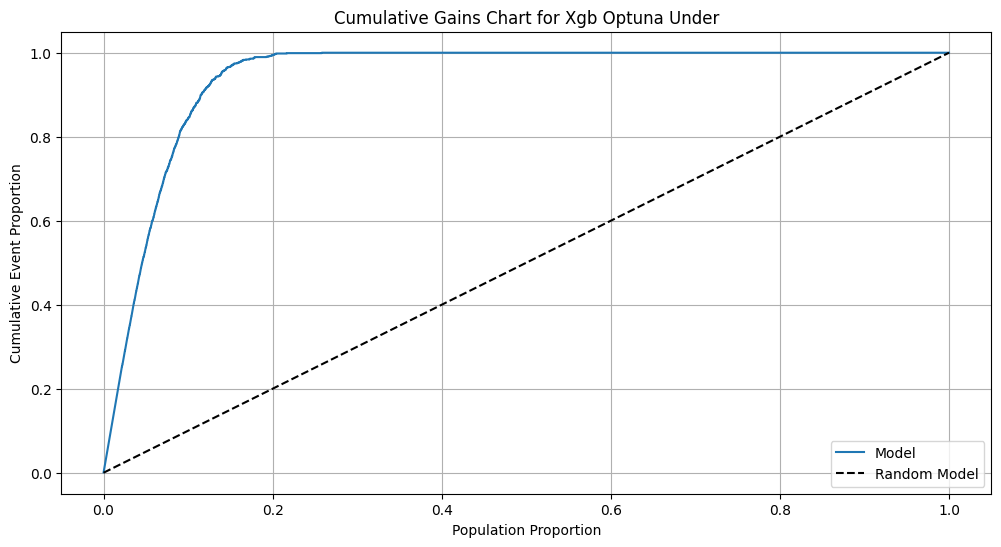

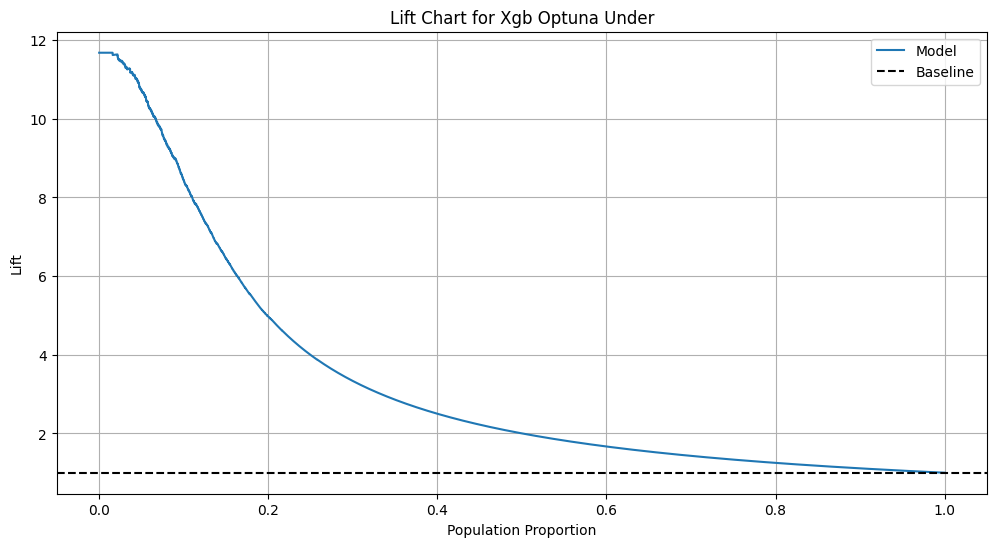

In [ ]:
all_results_new = {}

for model_file, model in loaded_models.items():
    model_name = model_file.replace(".pkl", "").replace("_", " ").title()
    print(f"Evaluating model: {model_name}")

    # Call the extended evaluation function
    all_results_new[model_name] = evaluate_model_with_charts(model, model_name, X_test_encoded, y_test)

In [ ]:
metrics_list = []

In [ ]:
for model_file, model in loaded_models.items():
    # Format the model name for display
    model_name = model_file.replace(".pkl", "").replace("_", " ").title()

    # Extract decile statistics from the results
    decile_stats = all_results[model_name]

    # Extract the metrics
    ks_stat = decile_stats["ks"].max()
    y_prob = model.predict_proba(X_test_encoded)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    gini_coefficient = 2 * auc_score - 1

    # Append metrics to the list
    metrics_list.append({
        "Model Name": model_name,
        "KS Statistic": ks_stat,
        "AUC": auc_score,
        "Gini Coefficient": gini_coefficient,
    })

In [ ]:
metrics_df = pd.DataFrame(metrics_list)

metrics_df.set_index("Model Name", inplace=True)

metrics_df

KS Statistic       AUC  Gini Coefficient
Model Name                                                                    
Logistic Regression Best Model Over      86.252933  0.983253          0.966506
Logistic Regression Best Model Under     86.252933  0.983301          0.966603
Xgboost Best Model Under                 86.666409  0.985747          0.971495
Logreg Optuna Over                       86.149564  0.983265          0.966530
Logreg Optuna Under                      86.252933  0.983292          0.966584
Lr Model Over                            86.252933  0.983251          0.966502
Lr Model Under                           86.252933  0.983220          0.966439
Xgb Model Under                          86.252933  0.982404          0.964808
Xgb Optuna Under                         86.873147  0.986281          0.972563

In [ ]:
metrics_df[(metrics_df['KS Statistic'] == metrics_df['KS Statistic'].max()) |
           (metrics_df['AUC'] == metrics_df['AUC'].max()) |
           (metrics_df['Gini Coefficient'] == metrics_df['Gini Coefficient'].max())]

KS Statistic       AUC  Gini Coefficient
Model Name                                                
Xgb Optuna Under     86.873147  0.986281          0.972563

## **Analyzing the Selected Model**

In [ ]:
xgb_model = joblib.load('/content/xgb_optuna_under.pkl')

In [ ]:
!pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=2f063752185606d9d9d6ed127536d121ddb4586301812f2b7db5ac844fd325eb
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import shap
import xgboost as xgb

In [ ]:
# 1. Create DMatrix for XGBoost
dtest = xgb.DMatrix(X_test_encoded)

In [ ]:
# 2. Generate SHAP values
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_encoded)

In [ ]:
shap_values.shape

(12356, 15)

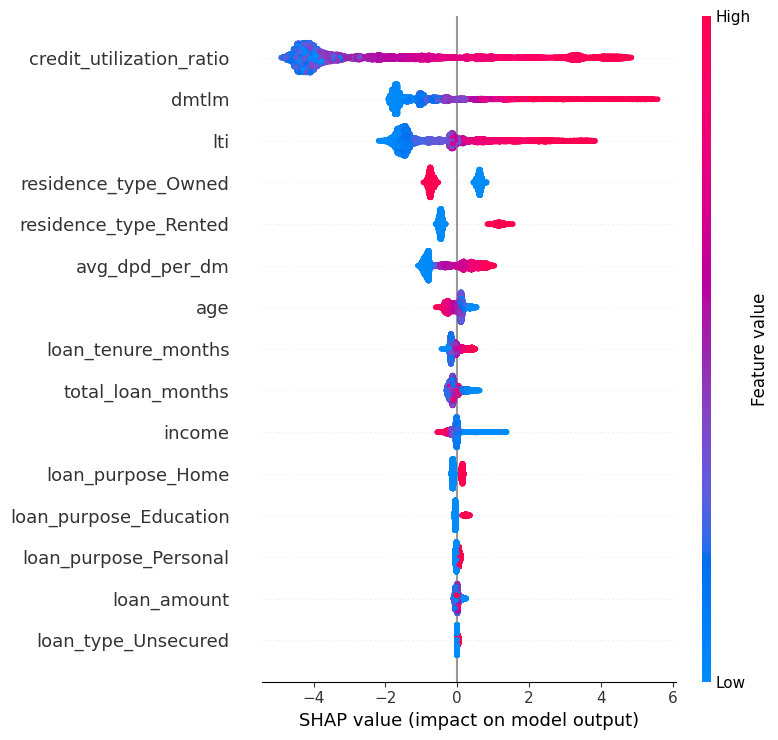

In [ ]:
# 3. SHAP Summary Plot (Global Interpretation)
shap.summary_plot(shap_values, X_test_encoded)

In [ ]:
xgb_model.feature_importances_

array([0.3188594 , 0.14347881, 0.08229672, 0.0476978 , 0.02601227,
       0.04868049, 0.02078477, 0.01377113, 0.01946129, 0.02176237,
       0.06976045, 0.0224109 , 0.01570247, 0.06743219, 0.08188897],
      dtype=float32)

In [ ]:
xgb_model.feature_names_in_

array(['credit_utilization_ratio', 'dmtlm', 'lti', 'avg_dpd_per_dm',
       'loan_tenure_months', 'total_loan_months', 'age', 'loan_amount',
       'income', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured',
       'residence_type_Owned', 'residence_type_Rented'], dtype='<U24')

In [ ]:
feature_importance_df = pd.DataFrame()
feature_importance_df['Features'] = xgb_model.feature_names_in_
feature_importance_df['Values'] = xgb_model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = 'Values', ascending = False)
feature_importance_df

Features    Values
0   credit_utilization_ratio  0.318859
1                      dmtlm  0.143479
2                        lti  0.082297
14     residence_type_Rented  0.081889
10         loan_purpose_Home  0.069760
13      residence_type_Owned  0.067432
5          total_loan_months  0.048680
3             avg_dpd_per_dm  0.047698
4         loan_tenure_months  0.026012
11     loan_purpose_Personal  0.022411
9     loan_purpose_Education  0.021762
6                        age  0.020785
8                     income  0.019461
12       loan_type_Unsecured  0.015702
7                loan_amount  0.013771

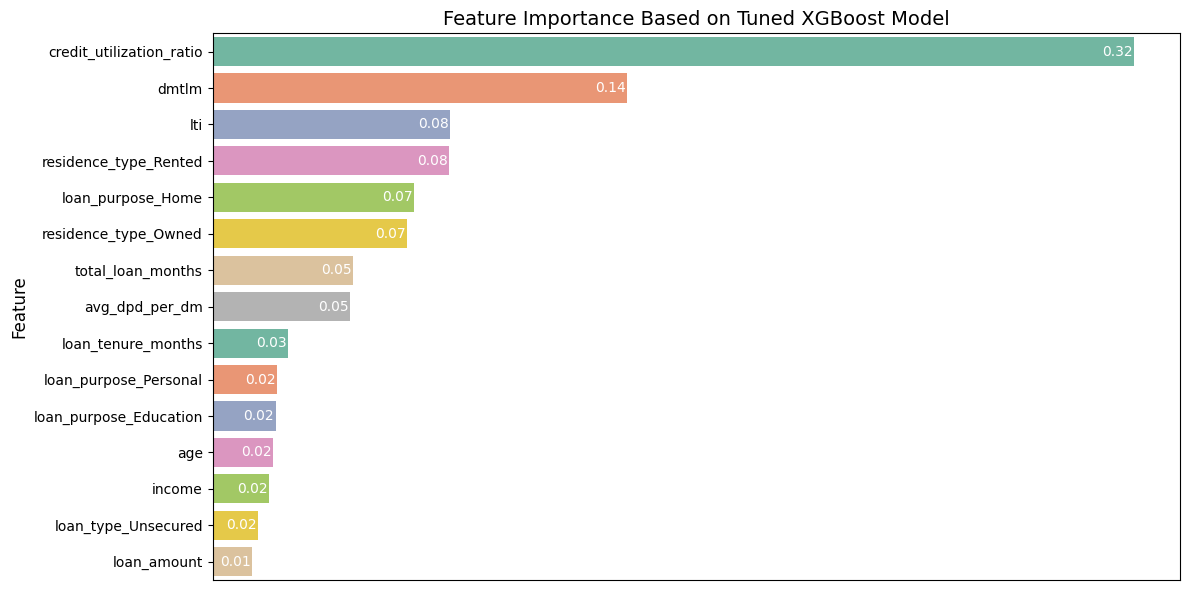

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(data=feature_importance_df, y='Features', x='Values', palette='Set2')
plt.title('Feature Importance Based on Tuned XGBoost Model', fontsize=14)
plt.xlabel('')
plt.ylabel('Feature', fontsize=12)

# Add importance values inside the end of each bar
for bar, value in zip(plt.gca().patches, feature_importance_df['Values']):
    plt.gca().text(
        bar.get_width() - 0.0005,   # Adjust position to fit the text inside the bar
        bar.get_y() + bar.get_height() / 2,
        f'{value:.2f}',          # Format the value
        ha='right',              # Align text to the right
        va='center',             # Vertically align text to the center
        fontsize=10,
        color='white'
    )

# Remove x-ticks
plt.xticks([])

# Add gridlines for clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
X_test_encoded.head(1)

credit_utilization_ratio     dmtlm       lti  avg_dpd_per_dm  \
31542                 -0.285127  0.361492  1.216795        0.650168   

       loan_tenure_months  total_loan_months      age  loan_amount    income  \
31542            1.775531          -1.191388  0.45318    -0.269655 -0.658696   

       loan_purpose_Education  loan_purpose_Home  loan_purpose_Personal  \
31542                   False               True                  False   

       loan_type_Unsecured  residence_type_Owned  residence_type_Rented  
31542                False                 False                  False

In [ ]:
y_test.head(1)

31542    False
Name: default, dtype: bool

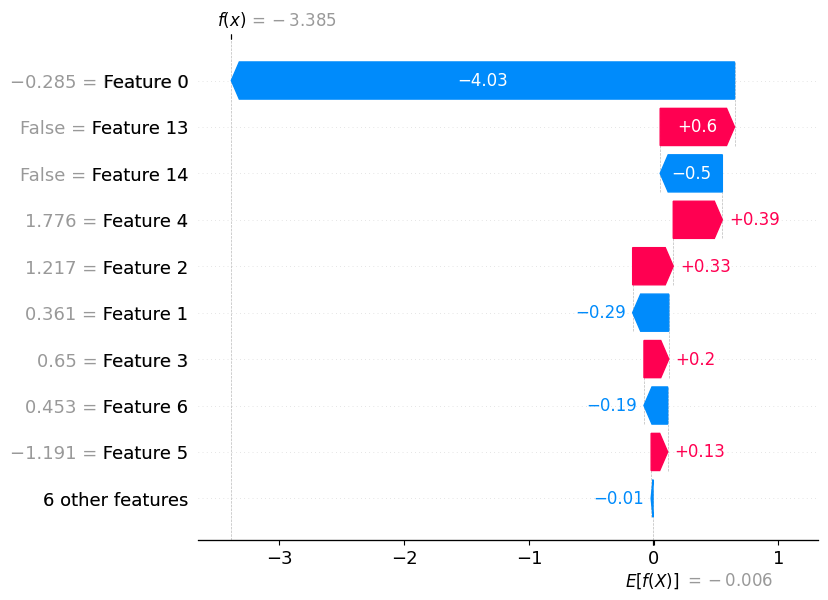

In [ ]:
# Waterfall plot for a single prediction
index = 0
shap.waterfall_plot(shap.Explanation(values=shap_values[index], base_values=explainer.expected_value, data=X_test_encoded.iloc[index]))

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
# 1. Initialize LIME Explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train_balanced_under.values,
    feature_names=X_train_balanced_under.columns,
    class_names=['Non-Default', 'Default'],
    mode='classification'
)

# 2. Explain a single instance
index = 0
instance = X_test_encoded.iloc[index].values
lime_exp = lime_explainer.explain_instance(
    data_row=instance,
    predict_fn=xgb_model.predict_proba
)

# 3. Visualize Explanation
lime_exp.show_in_notebook(show_table=True)
lime_exp.as_list()

[('-0.46 < credit_utilization_ratio <= 0.80', -0.3362721671456246),
 ('residence_type_Rented <= 0.00', -0.13987930862540465),
 ('residence_type_Owned <= 0.00', 0.07752742684490868),
 ('-0.12 < lti <= 1.35', 0.05030132588357205),
 ('-0.14 < dmtlm <= 0.76', -0.04057285721046304),
 ('0.58 < avg_dpd_per_dm <= 0.93', 0.038510783944356294),
 ('-0.06 < age <= 0.56', 0.022029116992285942),
 ('loan_tenure_months > 0.97', 0.015831263525636567),
 ('0.00 < loan_purpose_Home <= 1.00', -0.00999691568519126),
 ('-0.72 < income <= -0.30', -0.007420603574260159)]

In [ ]:
xgb_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.7136867658100697,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 3,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 388,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.6272358596011762,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'eta': 0.03962150782811734}

In [ ]:
tuned_hyperparameters = xgb_model.get_params()

keys_of_interest = ['eta', 'max_depth', 'subsample', 'colsample_bytree', 'n_estimators']
filtered_hyperparameters = {key: tuned_hyperparameters[key] for key in keys_of_interest}

print(filtered_hyperparameters)

{'eta': 0.03962150782811734, 'max_depth': 3, 'subsample': 0.6272358596011762, 'colsample_bytree': 0.7136867658100697, 'n_estimators': 388}


In [ ]:
with open('tuned_hyperparameters.txt', 'w') as file:
    for key, value in filtered_hyperparameters.items():
        file.write(f"{key}: {value}\n")

print("Tuned hyperparameters saved to 'tuned_hyperparameters.txt'")

Tuned hyperparameters saved to 'tuned_hyperparameters.txt'


In [ ]:
model_data['model'] = xgb_model
model_data

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.7136867658100697, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eta=0.03962150782811734, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=388, n_jobs=None,
               num_parallel_tree=None, ...),
 'scaler': StandardScaler(),
 'features': ['credit_utilization_ratio',
  'dmtlm',
  'lti',
  'avg_dpd_per_dm',
  'loan_tenure_months',
  'total_loan_months',
  'age',
  'loan_amount',
  'inc

In [ ]:
joblib.dump(model_data, "model_data.pkl")

['model_data.pkl']

In [ ]:
import importlib

# List of libraries to check
libraries = [
    "joblib",
    "pandas",
    "numpy",
    "sklearn",
    "xgboost"
]

# Loop through each library and print its version
for library in libraries:
    try:
        module = importlib.import_module(library)
        print(f"{library} version: {module.__version__}")
    except ImportError:
        print(f"{library} is not installed.")
    except AttributeError:
        print(f"Unable to determine version for {library}.")

joblib version: 1.4.2
pandas version: 2.2.2
numpy version: 1.26.4
sklearn version: 1.5.2
xgboost version: 2.1.3
